In [1]:

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack


In [2]:
data = pd.read_json('tops_fashion.json')

In [3]:
print ('Number of data points : ', data.shape[0], 'Number of features/variables:', data.shape[1])

Number of data points :  183138 Number of features/variables: 19


In [4]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [5]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [6]:
print ('Number of data points : ', data.shape[0], 'Number of features:', data.shape[1])

Number of data points :  183138 Number of features: 7


In [7]:
data.head()

asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

In [8]:

print(data['product_type_name'].describe())


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [9]:

print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [10]:

product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [11]:

print(data['brand'].describe())


count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [12]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [13]:

print(data['color'].describe())



count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [14]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [15]:
print(data['formatted_price'].describe())


count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [16]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [17]:
print(data['title'].describe())



count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [18]:
!mkdir "pickels"

A subdirectory or file pickels already exists.


In [19]:

data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 178026


In [20]:
data.iloc[0]

asin                                                        B016I2TS4W
brand                                                            FNC7C
color                                                             None
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                Minions Como Superheroes Ironman Long Sleeve R...
formatted_price                                                   None
Name: 0, dtype: object

In [21]:
data.shape

(183138, 7)

In [22]:
data.to_pickle('pickels/180k_apparel_data')

In [23]:
data = pd.read_pickle("pickels/180k_apparel_data")

In [24]:

data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

asin       brand  color  \
27547  B073W7P8KK  Nation LTD   Blue   
31277  B01M0PWMZ8      Anglin  White   
30453  B01M02GWRG      Anglin  White   
32485  B01N0ADXM0      Anglin    Red   
26767  B01MTQAU86      Anglin  Black   

                                        medium_image_url product_type_name  \
27547  https://images-na.ssl-images-amazon.com/images...             DRESS   
31277  https://images-na.ssl-images-amazon.com/images...             SHIRT   
30453  https://images-na.ssl-images-amazon.com/images...             SHIRT   
32485  https://images-na.ssl-images-amazon.com/images...             SHIRT   
26767  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                   title formatted_price  
27547  ❀Nation Women Stripe Blouse Long Sleeve Shirt ...            None  
31277  ✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...            None  
30453  ✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...            None  
32485  ✽ANGLIN✽ Women Fashion Stripe Dress Round Coll...            None  
26767  ✽ANGLIN✽ Women Autumn Winter Christmas Printin...            None

In [25]:
data = pd.read_pickle("pickels/180k_apparel_data")

In [26]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [27]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    
    a = data['title'].loc[indices[i]].split()

    j = i+1
    while j < num_data_points:

        
        b = data['title'].loc[indices[j]].split()

   
        length = max(len(a), len(b))

        count  = 0

        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        if (length - count) > 2: 
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])


            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [28]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [29]:
print('Number of data points : ', data.shape[0])

Number of data points :  151251


In [31]:
print('Number of data points : ', data.shape[0])

Number of data points :  151251


In [32]:
data.to_pickle('pickels/DataFinal')

In [33]:
import numpy as np
import pandas as pd

In [34]:
data = pd.read_pickle('pickels/DataFinal')

In [35]:
data.shape

(151251, 7)

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [37]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            
            word = ("".join(e for e in words if e.isalnum()))
           
            word = word.lower()
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'are', 'between', 'him', 'were', 'does', 'doesn', 'above', 'any', 'during', 'that', 'ain', 'yourself', 'from', 'haven', 'its', 'before', 'her', "isn't", 'was', 'couldn', 'about', 'should', 'not', 'my', 'what', 'wasn', "don't", 'after', "shan't", 'doing', 'their', 'once', 'itself', "couldn't", 'when', 'into', 'in', 'weren', 'we', 'your', 'this', 'down', "wasn't", 'he', 'further', "should've", 'if', 'and', 'whom', 'for', 'off', 'under', 'too', 'didn', 'here', "wouldn't", "you'd", 'i', 'each', 'the', 'over', "hadn't", 'ourselves', 'to', 'ma', 'you', 'through', 'can', 'himself', 'mustn', 'as', 'because', 'these', 'isn', 'll', 'theirs', 'themselves', 'ours', 'aren', 'then', 'who', 'those', 'with', 'there', 'up', 'myself', 'shouldn', 'just', "doesn't", "hasn't", 'hers', 'been', 'most', 'both', 'which', 'at', 'below', 'me', 'do', 'how', "shouldn't", 'did', 'where', 'is', 'such', "you're", 'but', 'very', "mustn't", "didn't", 'while', 'by', 'all', 'some', "won't", 'a', 'o',

In [38]:
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [39]:
data.to_pickle('pickels/Data_final_preprocessed')

In [41]:
data = pd.read_pickle('pickels/Data_final_preprocessed')

In [42]:

def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
    
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
    
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) 
        ax.set_title(text) 
    
        ax = plt.subplot(gs[1])
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        display_img(url, ax, fig)
    
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

 
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    keys = list(vec2.keys())
    
    values = [vec2[x] for x in vec2.keys()]
    
    

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
           
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
           
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)



def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
   
    return Counter(words) 

def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
 
    vector1 = text_to_vector(text1)

    
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() 

(151251, 42835)

In [44]:
def bag_of_words_model(doc_id, num_results):
   
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)
        

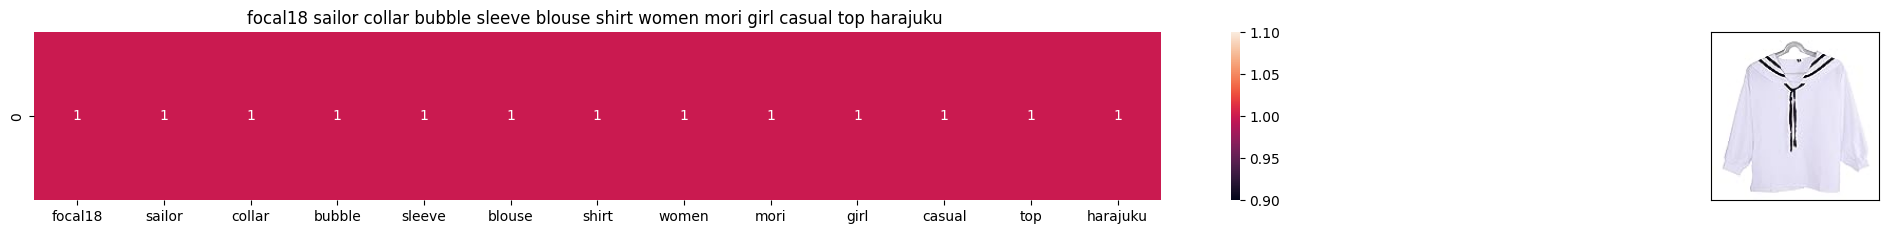

ASIN : B01N19U5H5
Brand: Focal18
Title: focal18 sailor collar bubble sleeve blouse shirt women mori girl casual top harajuku 
Euclidean similarity with the query image : 0.0


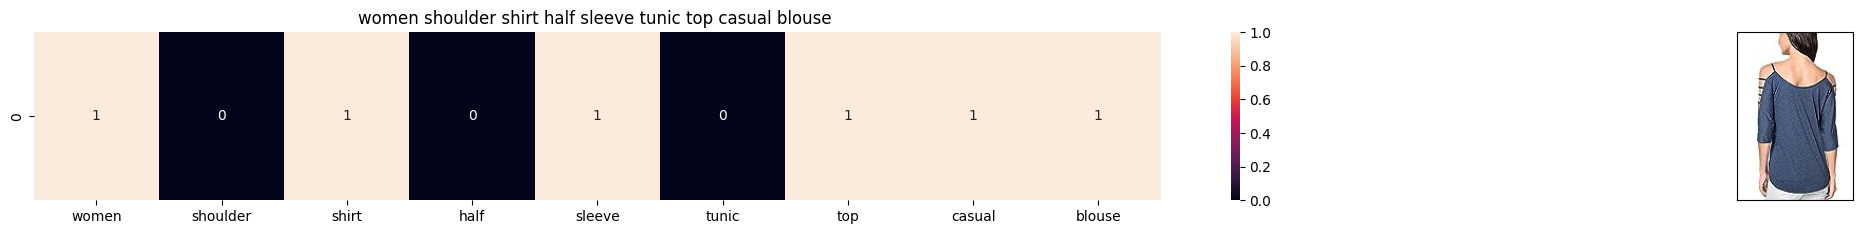

ASIN : B01G5DBM7U
Brand: U-Kiss
Title: women shoulder shirt half sleeve tunic top casual blouse 
Euclidean similarity with the query image : 3.1622776601683795


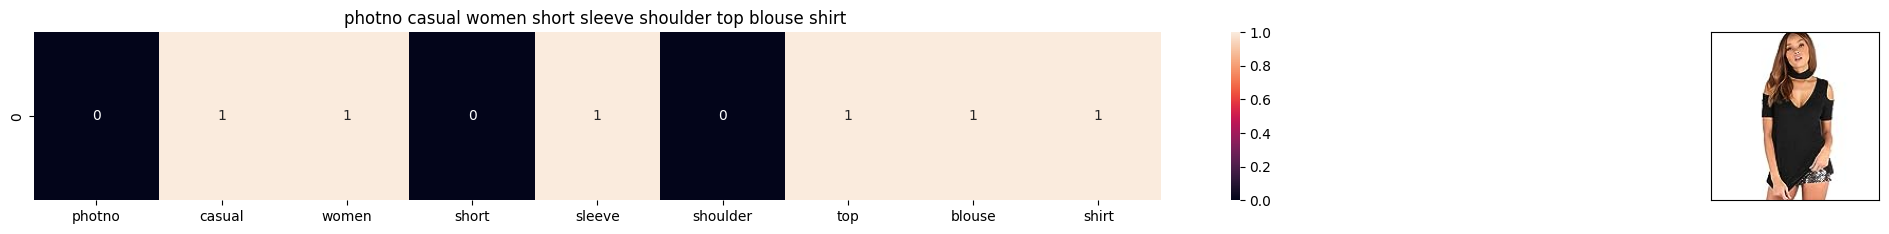

ASIN : B071H6VC4P
Brand: PHOTNO
Title: photno casual women short sleeve shoulder top blouse shirt 
Euclidean similarity with the query image : 3.1622776601683795


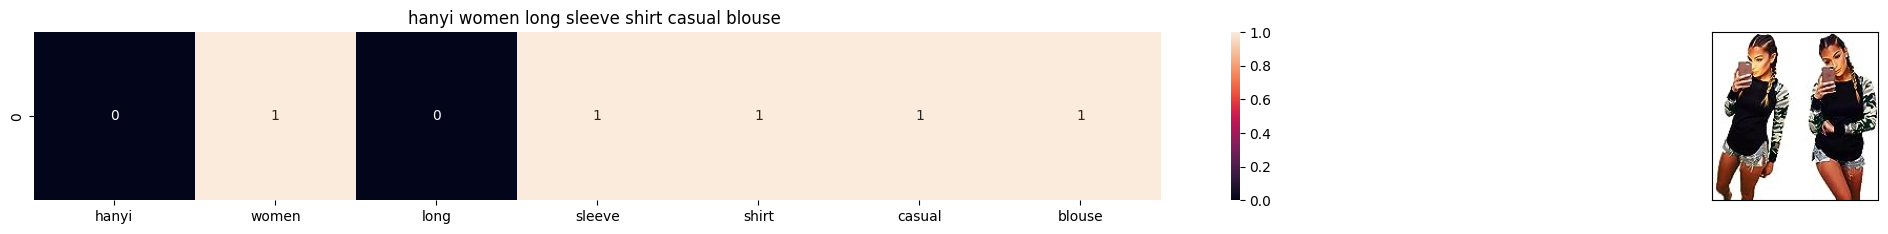

ASIN : B01LYSKVZ1
Brand: HANYI
Title: hanyi women long sleeve shirt casual blouse 
Euclidean similarity with the query image : 3.1622776601683795


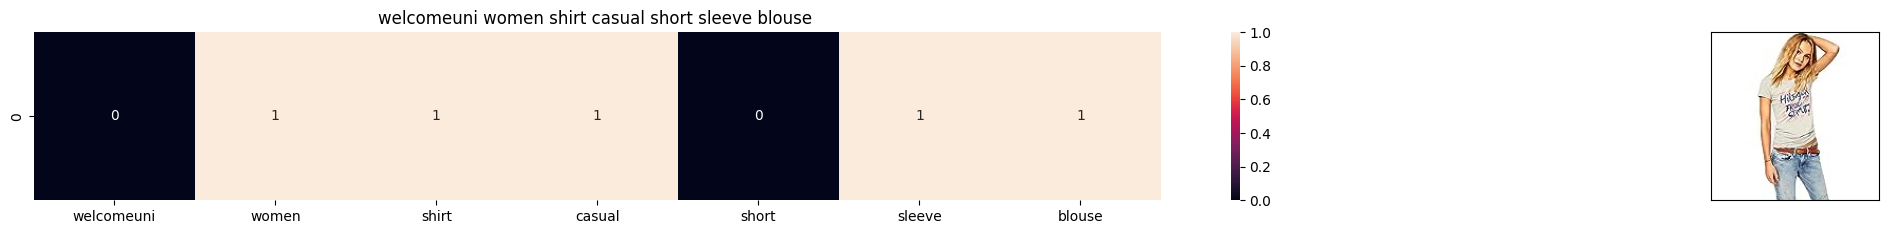

ASIN : B01DD3M0MG
Brand: welcomeuni 1340
Title: welcomeuni women shirt casual short sleeve blouse 
Euclidean similarity with the query image : 3.1622776601683795


In [45]:
bag_of_words_model(1, 5)

In [46]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])


In [47]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])

        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)

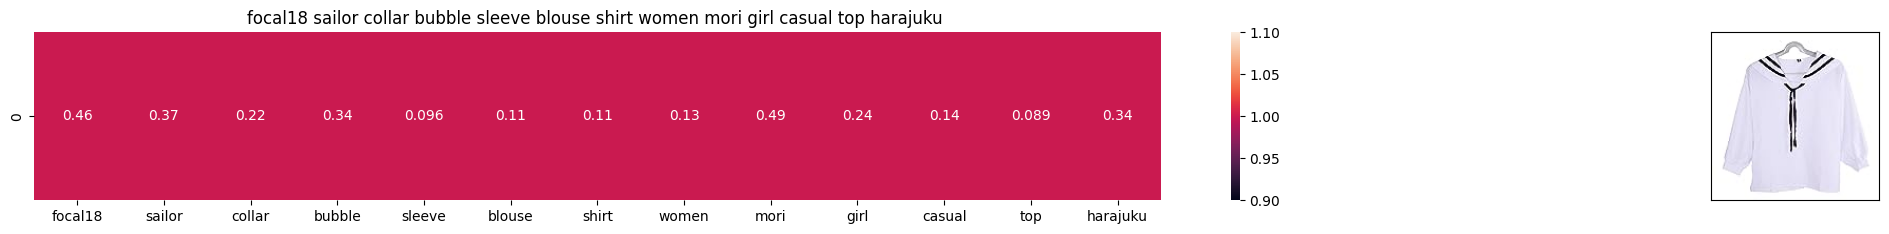

ASIN : B01N19U5H5
BRAND : Focal18
Title: focal18 sailor collar bubble sleeve blouse shirt women mori girl casual top harajuku 
Eucliden distance from the given image : 0.0


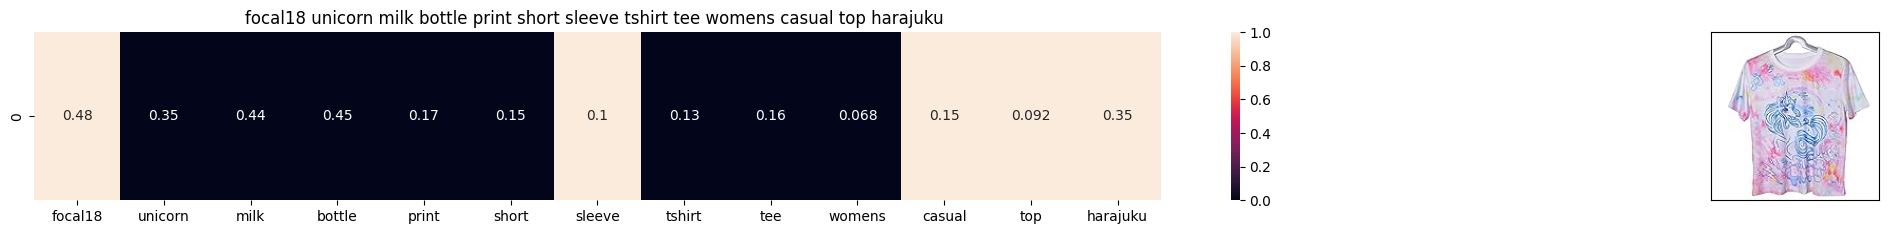

ASIN : B06W51XX12
BRAND : Focal18
Title: focal18 unicorn milk bottle print short sleeve tshirt tee womens casual top harajuku 
Eucliden distance from the given image : 1.119166252210056


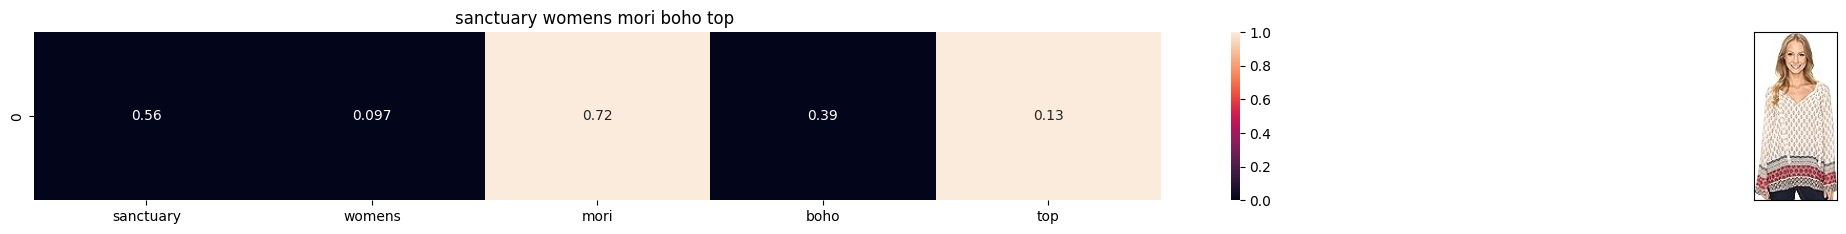

ASIN : B01JBL2Q32
BRAND : Sanctuary Clothing
Title: sanctuary womens mori boho top 
Eucliden distance from the given image : 1.129810326111054


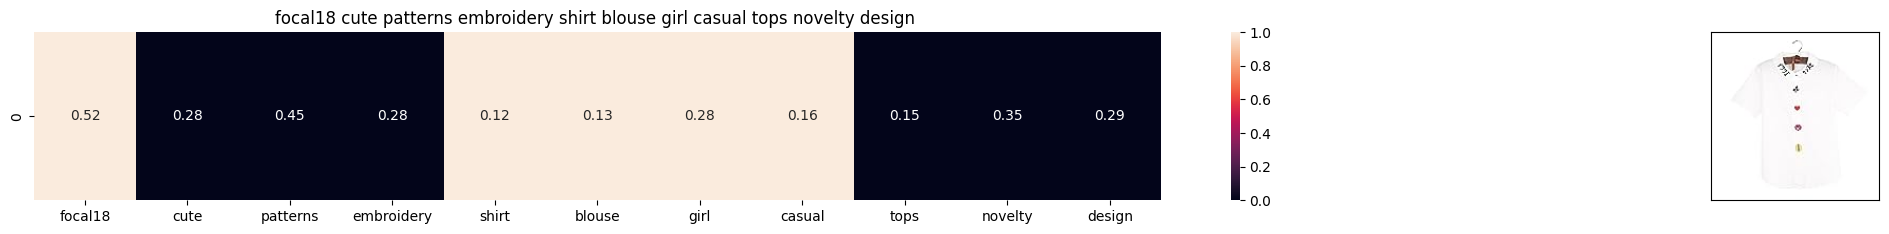

ASIN : B06W2LSCWB
BRAND : Focal18
Title: focal18 cute patterns embroidery shirt blouse girl casual tops novelty design 
Eucliden distance from the given image : 1.134735406639773


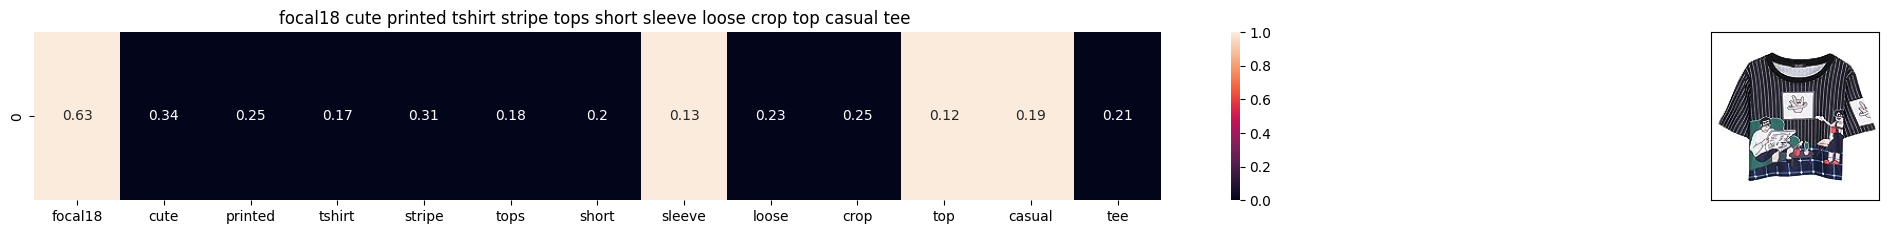

ASIN : B06VWJFFH7
BRAND : Focal18
Title: focal18 cute printed tshirt stripe tops short sleeve loose crop top casual tee 
Eucliden distance from the given image : 1.147529362212152


In [48]:
tfidf_model(1, 5)

In [49]:
data =data.loc[~data['color'].isnull()]
data =data.loc[~data['brand'].isnull()]
data =data.loc[~data['product_type_name'].isnull()]
data =data.loc[~data['title'].isnull()]

In [50]:
data = pd.read_pickle("pickels/28k_apperal_data_preprocessed")

In [51]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])



In [52]:
def n_containing(word):
   
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
  
    return math.log(data.shape[0] / (n_containing(word)))

In [53]:

idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
   
    idf_val = idf(i)

    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

C:\Users\Nivi\AppData\Local\Temp\ipykernel_9676\1711777964.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idf_title_features  = idf_title_features.astype(np.float)


In [54]:
pd.to_pickle(idf_title_features, 'pickels/idf_title_features)')

In [55]:
import pickle
with open('pickels/idf_title_features)', 'rb') as f:
    idf_title_features = pickle.load(f)

In [56]:
data

asin                        brand              color  \
4       B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6       B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11      B001LOUGE4                 Fitness Etc.              Black   
15      B003BSRPB0                  FeatherLite              White   
21      B014ICEDNA                        FNC7C             Purple   
...            ...                          ...                ...   
183110  B073YGRLSM              Sky and Sparrow               Rose   
183120  B01NCO06S0                  Faded Glory          Blue/Grey   
183124  B01AVN150E               Sacred Threads              Multi   
183133  B01MSALTSO                    TOOGOO(R)              Black   
183136  B074L8FVTT                susana monaco               Rose   

                                         medium_image_url product_type_name  \
4       https://images-na.ssl-images-amazon.com/images...             SHIRT   
6       https://images-na.ssl-images-amazon.com/images...             SHIRT   
11      https://images-na.ssl-images-amazon.com/images...             SHIRT   
15      https://images-na.ssl-images-amazon.com/images...             SHIRT   
21      https://images-na.ssl-images-amazon.com/images...             SHIRT   
...                                                   ...               ...   
183110  https://images-na.ssl-images-amazon.com/images...             SHIRT   
183120  https://images-na.ssl-images-amazon.com/images...             SHIRT   
183124  https://images-na.ssl-images-amazon.com/images...             SHIRT   
183133  https://images-na.ssl-images-amazon.com/images...         OUTERWEAR   
183136  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
4       featherlite ladies long sleeve stain resistant...          $26.26  
6       womens unique 100 cotton  special olympics wor...           $9.99  
11                ladies cotton tank 2x1 ribbed tank top           $11.99  
15      featherlite ladies moisture free mesh sport sh...          $20.54  
21      supernatural chibis sam dean castiel short sle...           $7.50  
...                                                   ...             ...  
183110           sky sparrow grommet lace top rose small           $26.99  
183120  faded glory womens plaid button 2 pocket shirt...          $18.99  
183124      printed top assorted colors  one size 215586           $22.00  
183133  toogoor womens tops spring autumn casual pullo...          $14.58  
183136  susana monaco womens susana monoco sleeveless ...          $44.99  

[28385 rows x 7 columns]

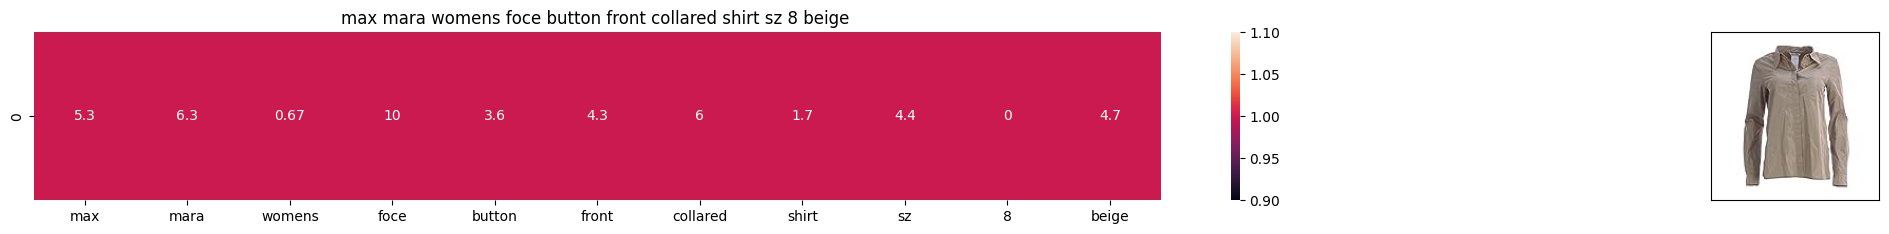

ASIN : B0749S36YR
Brand : MaxMara
euclidean distance from the given image : 0.0


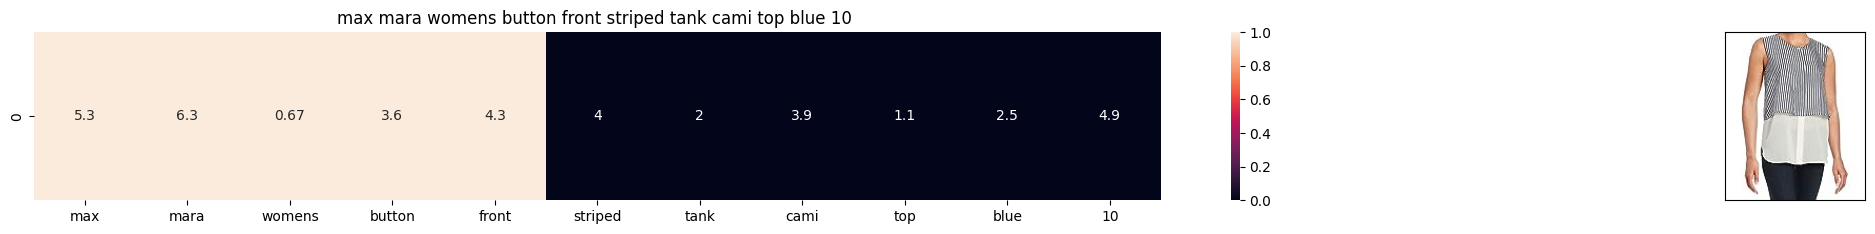

ASIN : B0758KDRF8
Brand : MaxMara
euclidean distance from the given image : 15.910834753686084


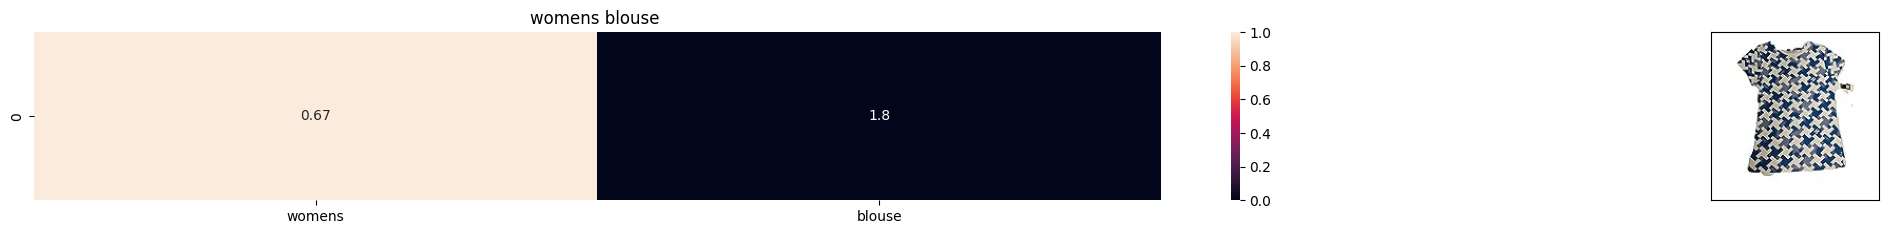

ASIN : B01MQ2MH0A
Brand : DC
euclidean distance from the given image : 16.950341394180743


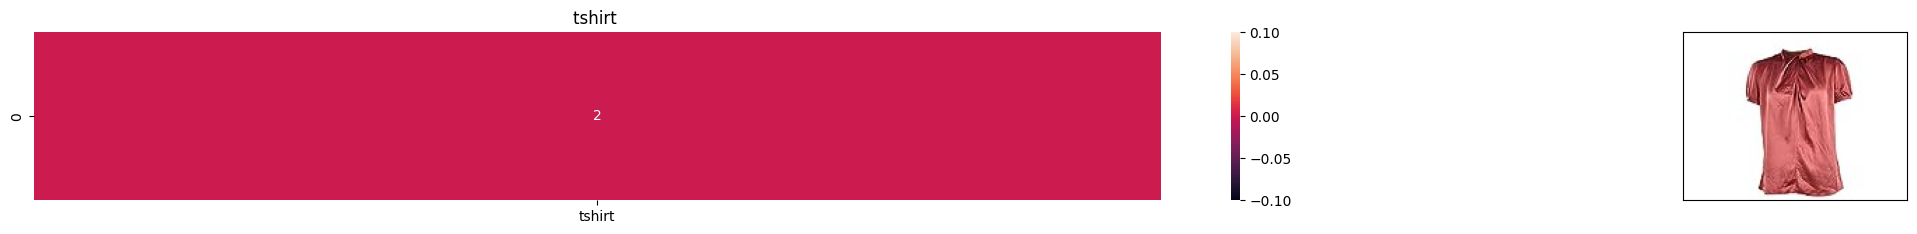

ASIN : B074PMR69Q
Brand : General
euclidean distance from the given image : 16.990285553681723


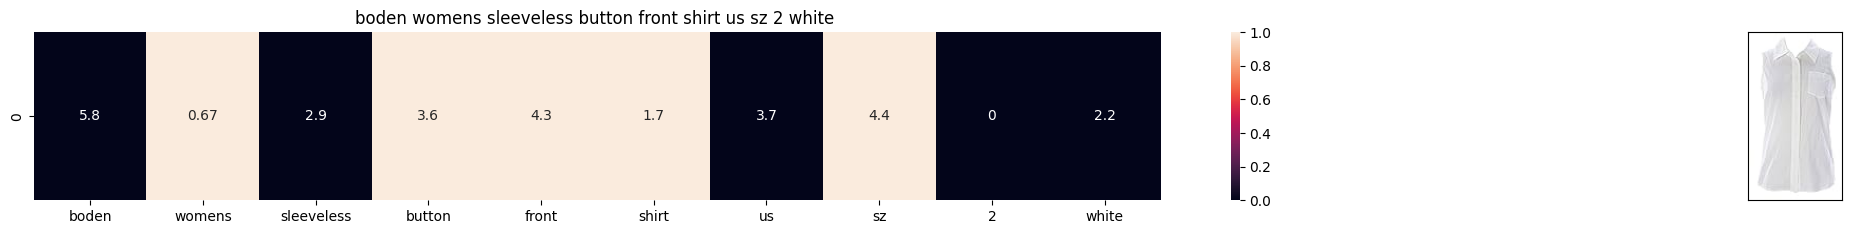

ASIN : B01H62U75W
Brand : BODEN
euclidean distance from the given image : 17.08452580258382


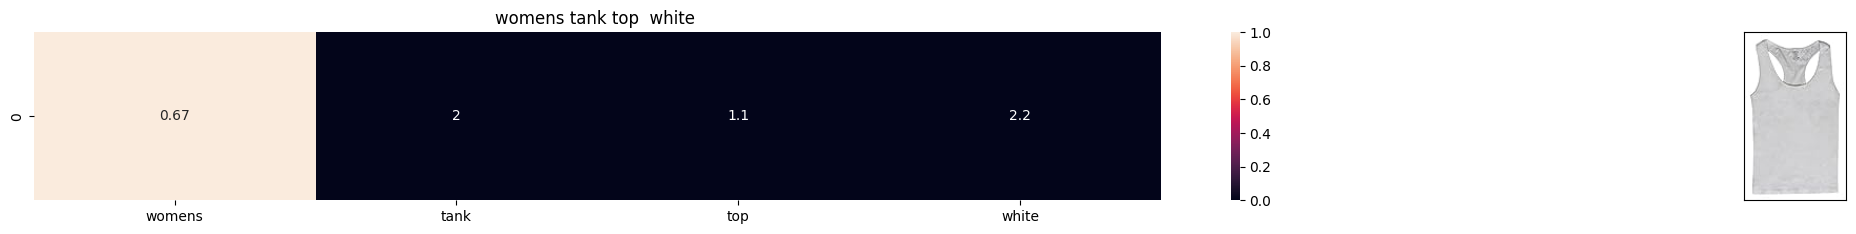

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 17.14532866174503


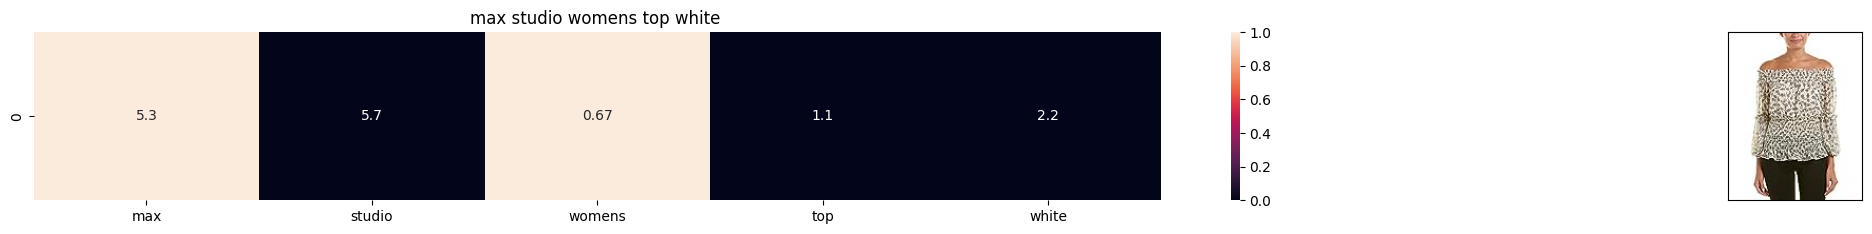

ASIN : B074LB4WN1
Brand : MAXSTUDIO
euclidean distance from the given image : 17.159420124313645


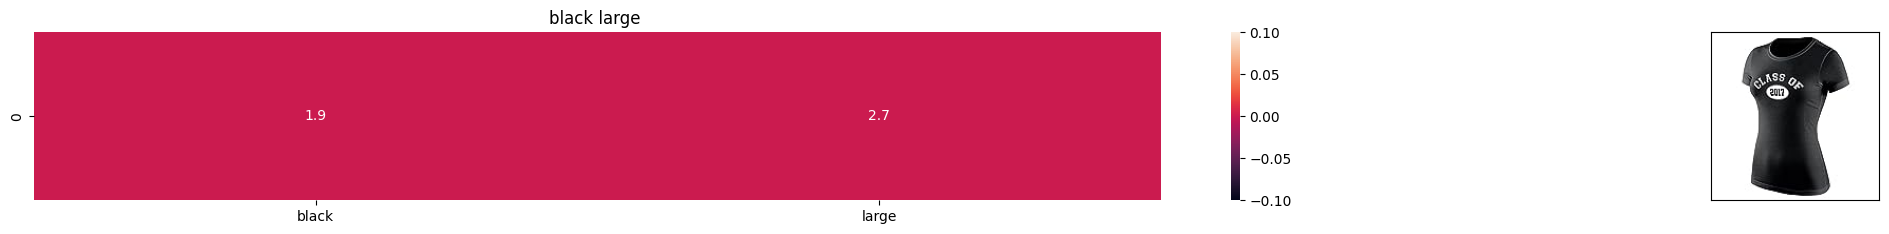

ASIN : B0746G2NZQ
Brand : Cherry Bobby
euclidean distance from the given image : 17.18554809478451


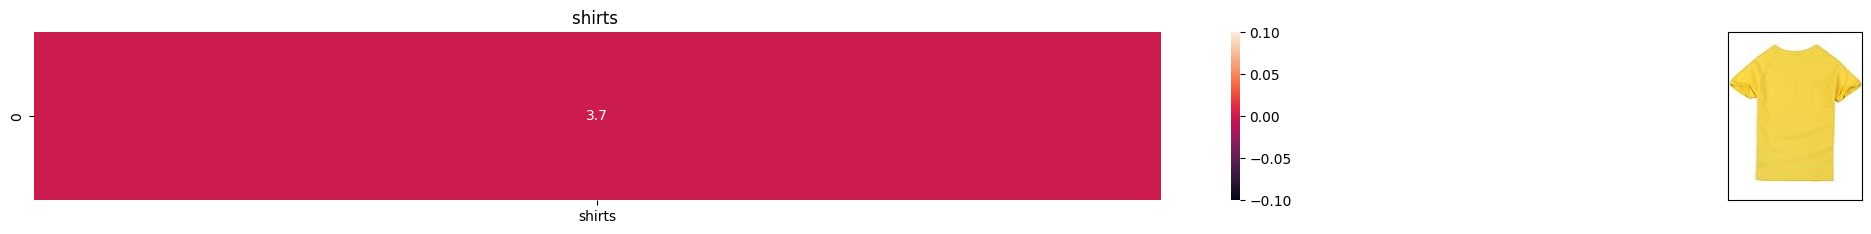

ASIN : B074HZVQRL
Brand : General
euclidean distance from the given image : 17.26907388494083


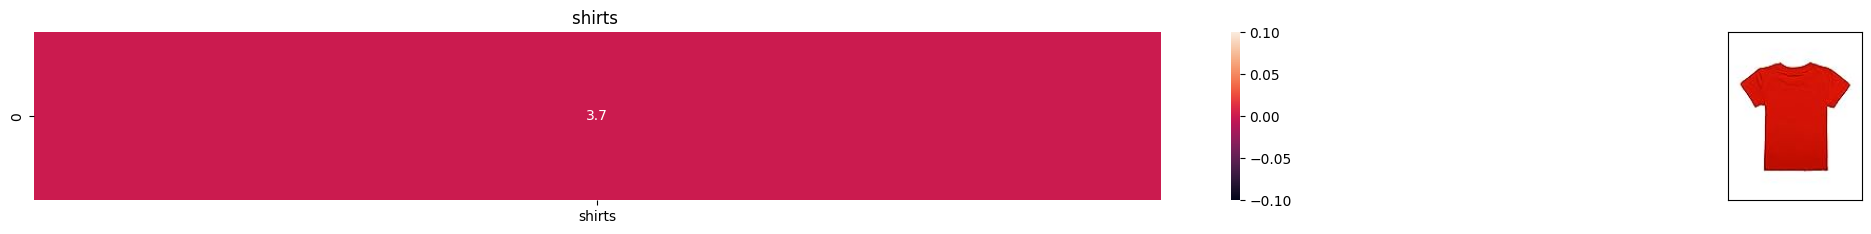

ASIN : B074PJZFPQ
Brand : General
euclidean distance from the given image : 17.26907388494083


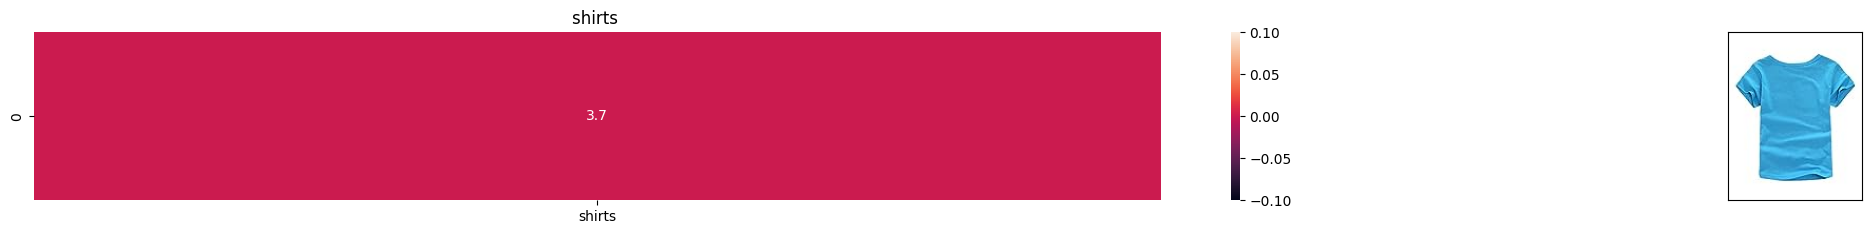

ASIN : B074J7886V
Brand : General
euclidean distance from the given image : 17.26907388494083


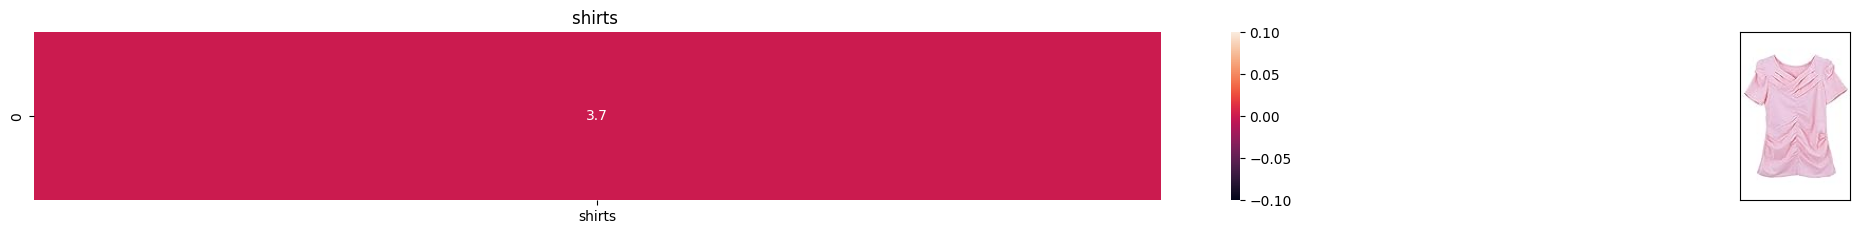

ASIN : B074PKQ2M6
Brand : General
euclidean distance from the given image : 17.26907388494083


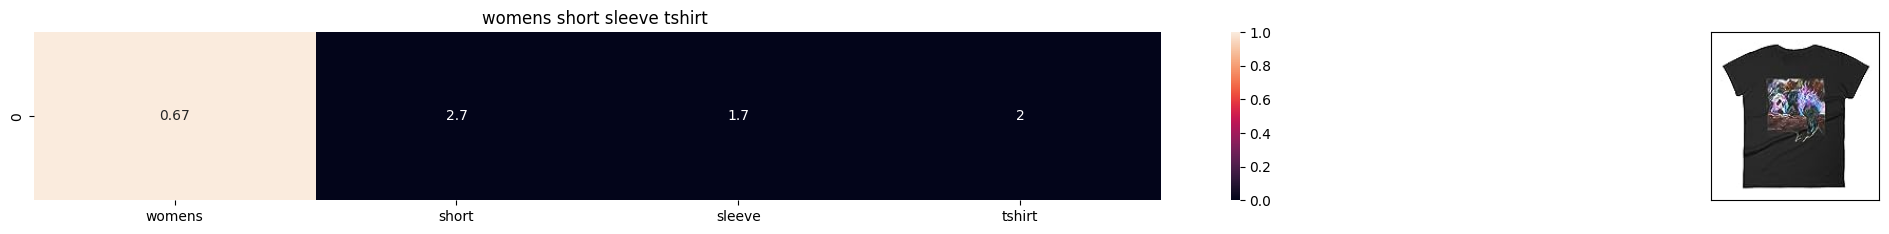

ASIN : B073WVC9RQ
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


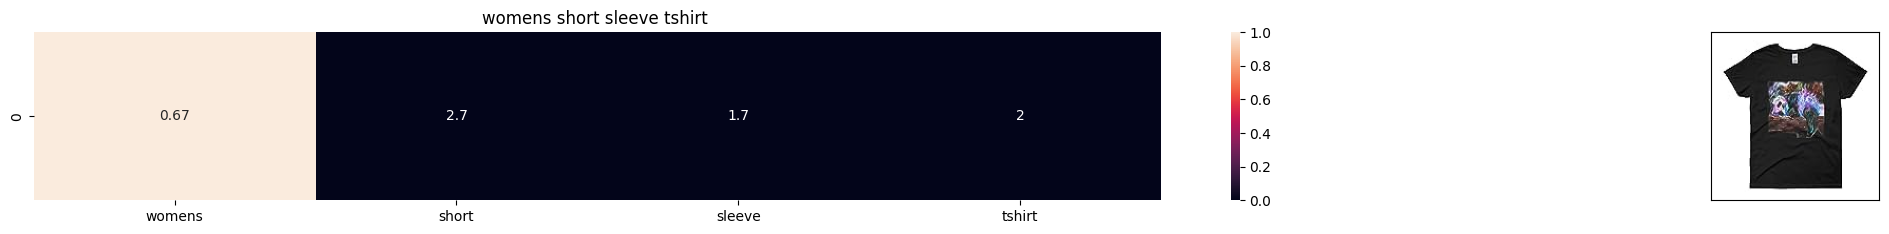

ASIN : B073WVBCHZ
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


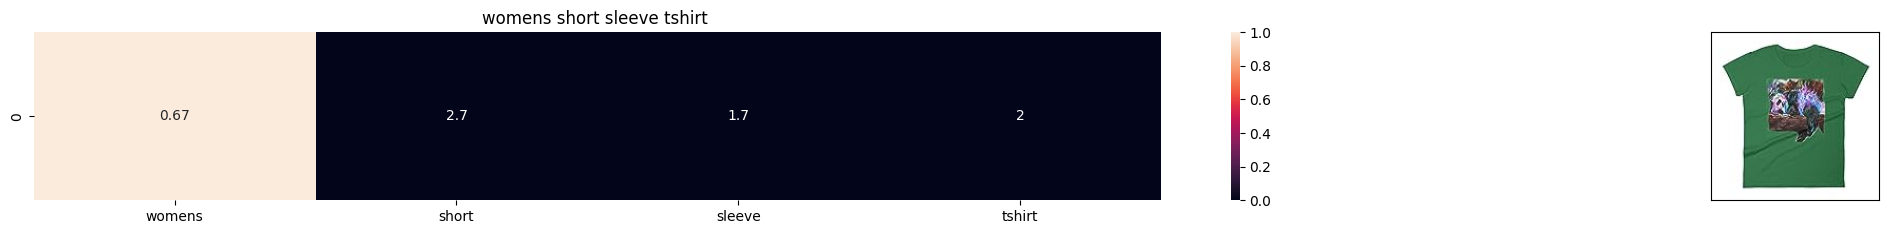

ASIN : B073WVPHL9
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


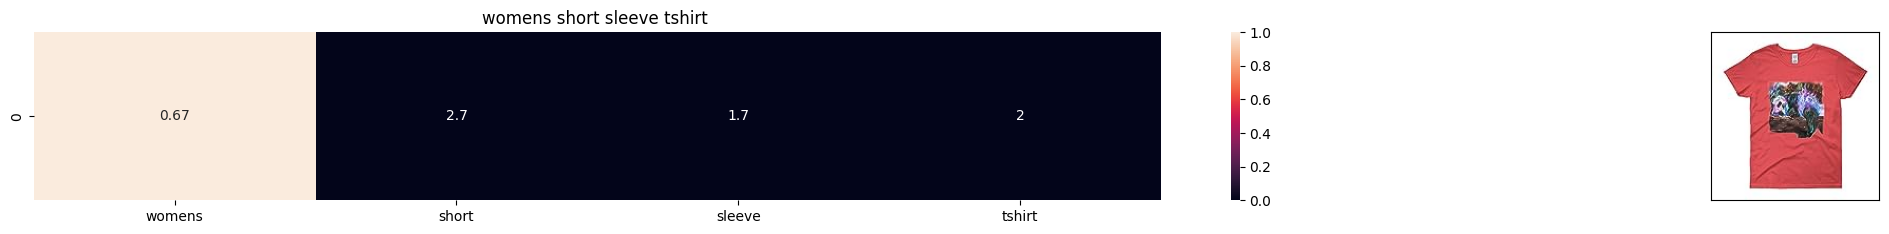

ASIN : B073WVHSBX
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


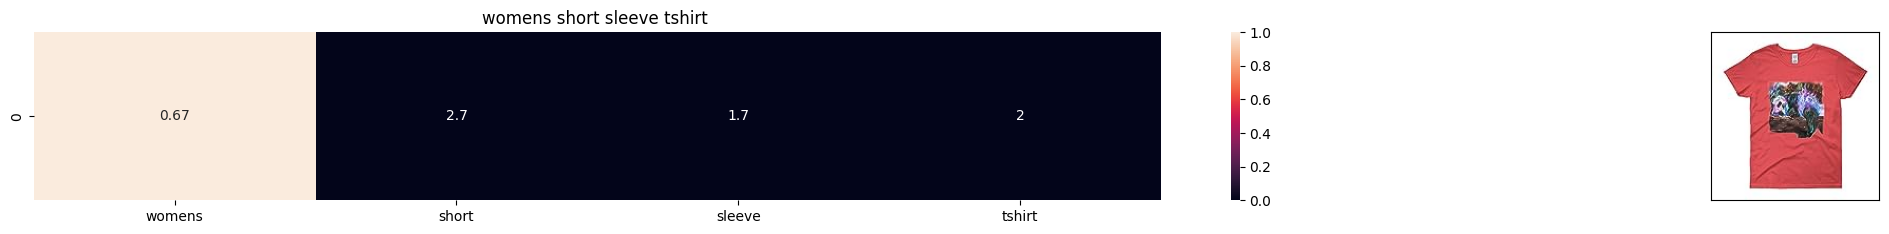

ASIN : B073WVNXXF
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


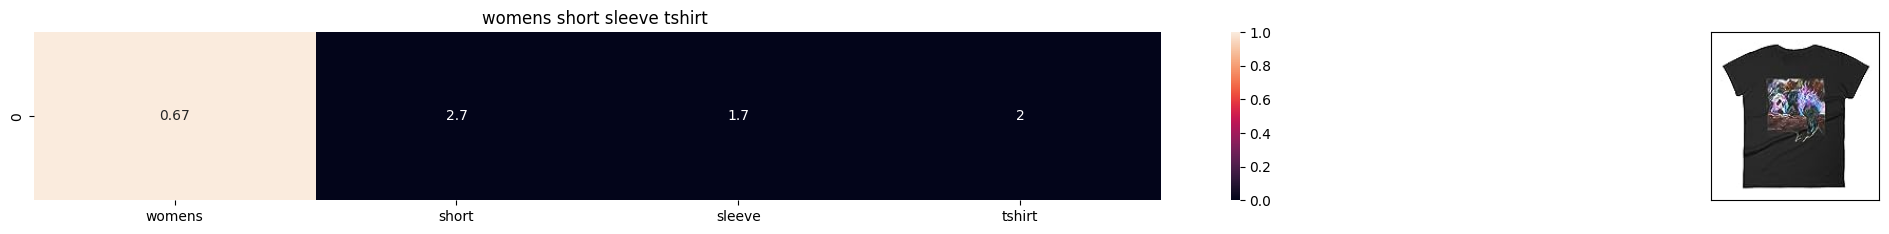

ASIN : B073WVVTB4
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


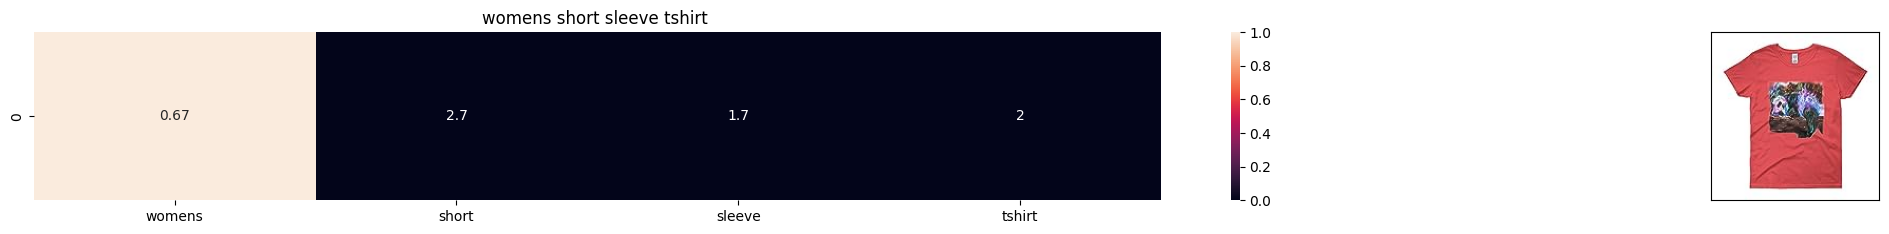

ASIN : B073WVHG2T
Brand : Starchild's Designs
euclidean distance from the given image : 17.274128247895934


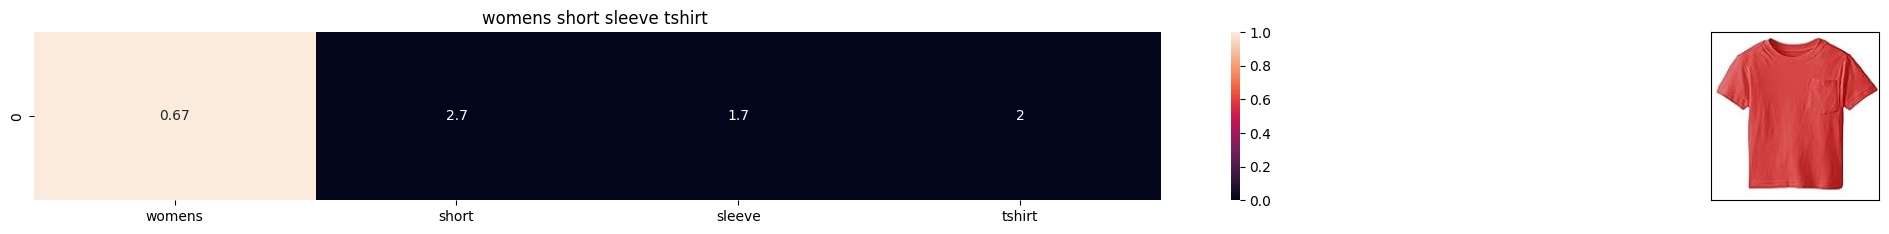

ASIN : B074MPHZNM
Brand : Magic
euclidean distance from the given image : 17.274128247895934


In [57]:
def idf_model(doc_id, num_results):
   
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
 
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(19584,20)


In [60]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


In [63]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from plotly.graph_objs import Scatter, Layout
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff


In [64]:
data = pd.read_pickle('pickels/28k_apperal_data_preprocessed')

In [65]:
data.shape

(28385, 7)

In [67]:
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [68]:
def get_word_vec(sentence, doc_id, m_name):
   
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            vec.append(np.zeros(shape=(300,)))
  
    return  np.array(vec)

def get_distance(vec1, vec2):
   
    final_dist = []
   
    for i in vec1:
        dist = []
        for j in vec2:
          
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    s1_s2_dist = get_distance(s1_vec, s2_vec)

    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    
    ax.set_xticklabels(sentence2.split())
   
    ax.set_yticklabels(sentence1.split())
  
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
  
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [69]:


vocab = model.keys()

def build_avg_vec(sentence, num_features, doc_id, m_name):
   

    featureVec = np.zeros((num_features,), dtype="float32")
    
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    
    return featureVec

In [70]:
def display_img(url,ax,fig):
   
    try:
      response = requests.get(url)
      img = Image.open(BytesIO(response.content))
     
      plt.imshow(img)
    except:
      pass


def plot_heatmap(keys, values, labels, url, text):
       
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
       
        ax = plt.subplot(gs[0])
      
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) 
        ax.set_title(text) 
        
        ax = plt.subplot(gs[1])
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        display_img(url, ax, fig)
      
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

  
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    for i in vec2:
        if i not in intersection:
            vec2[i]=0

  
    keys = list(vec2.keys())
   
    values = [vec2[x] for x in vec2.keys()]
    
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():

            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    
    

    plot_heatmap(keys, values, labels, url, text)

def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    
    return Counter(words)


def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    vector1 = text_to_vector(text1)

    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [71]:
doc_id = 0
w2v_title = []

for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

w2v_title = np.array(w2v_title)

In [72]:
def avg_w2v_model(doc_id, num_results):
   
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        

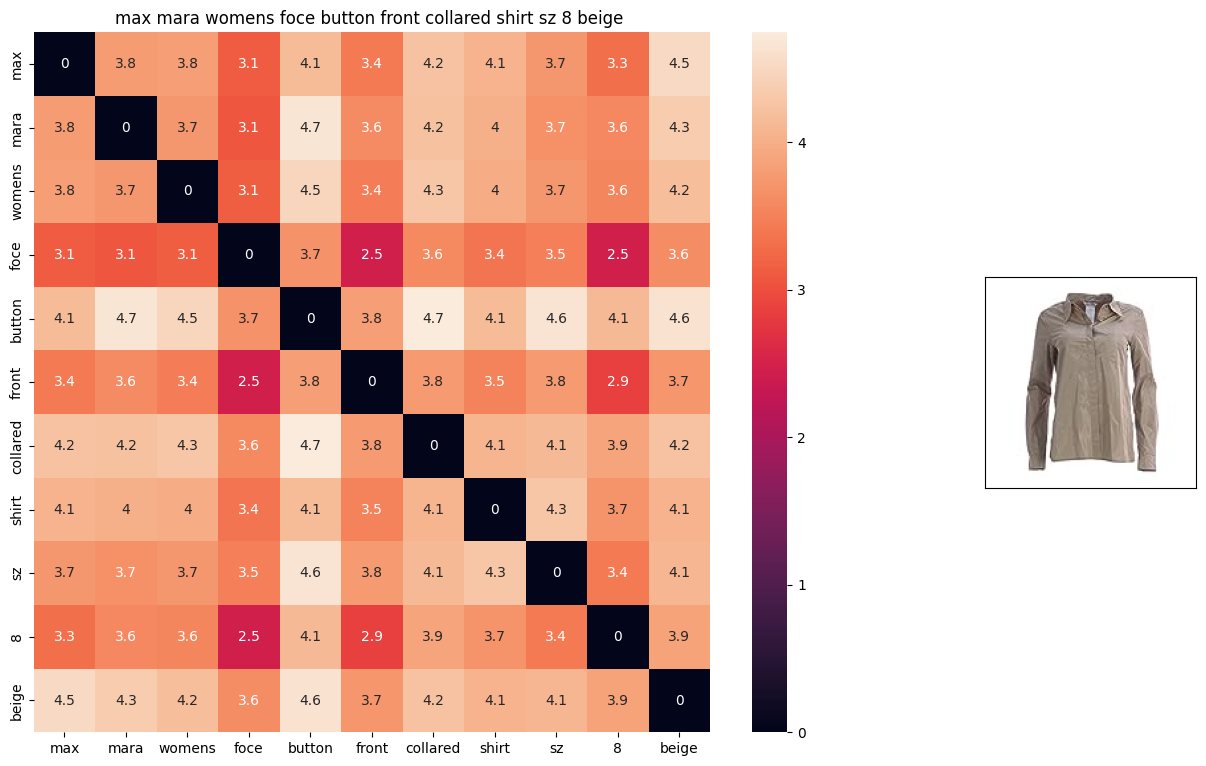

ASIN : B0749S36YR
BRAND : MaxMara
euclidean distance from given input image : 0.0


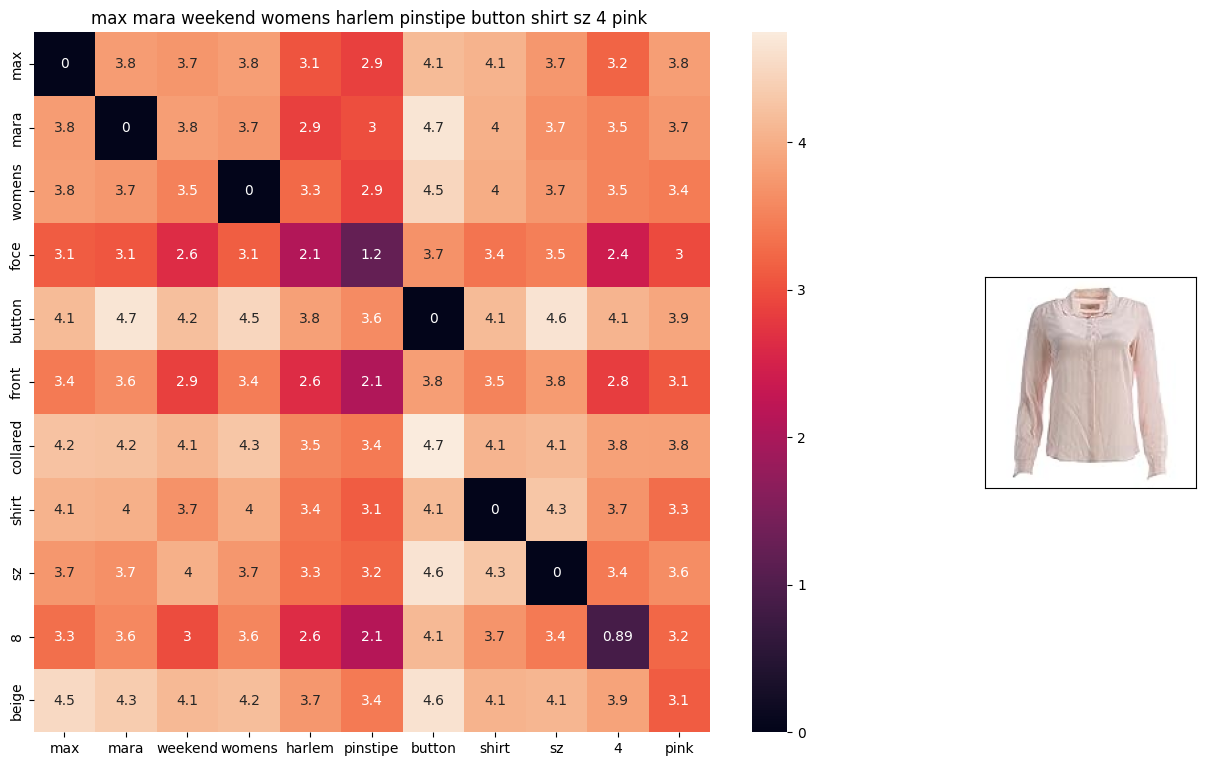

ASIN : B0749S8BQ7
BRAND : MaxMara
euclidean distance from given input image : 0.5466822


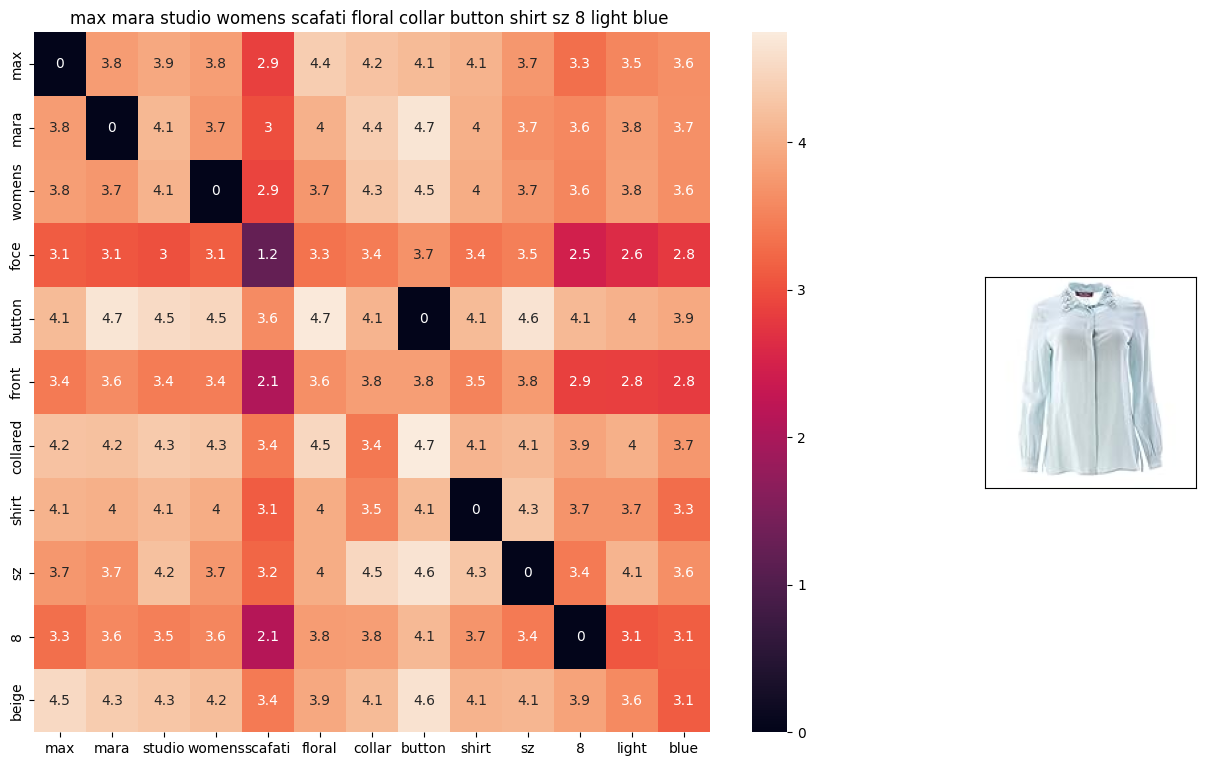

ASIN : B06XH7N85D
BRAND : MaxMara
euclidean distance from given input image : 0.56413823


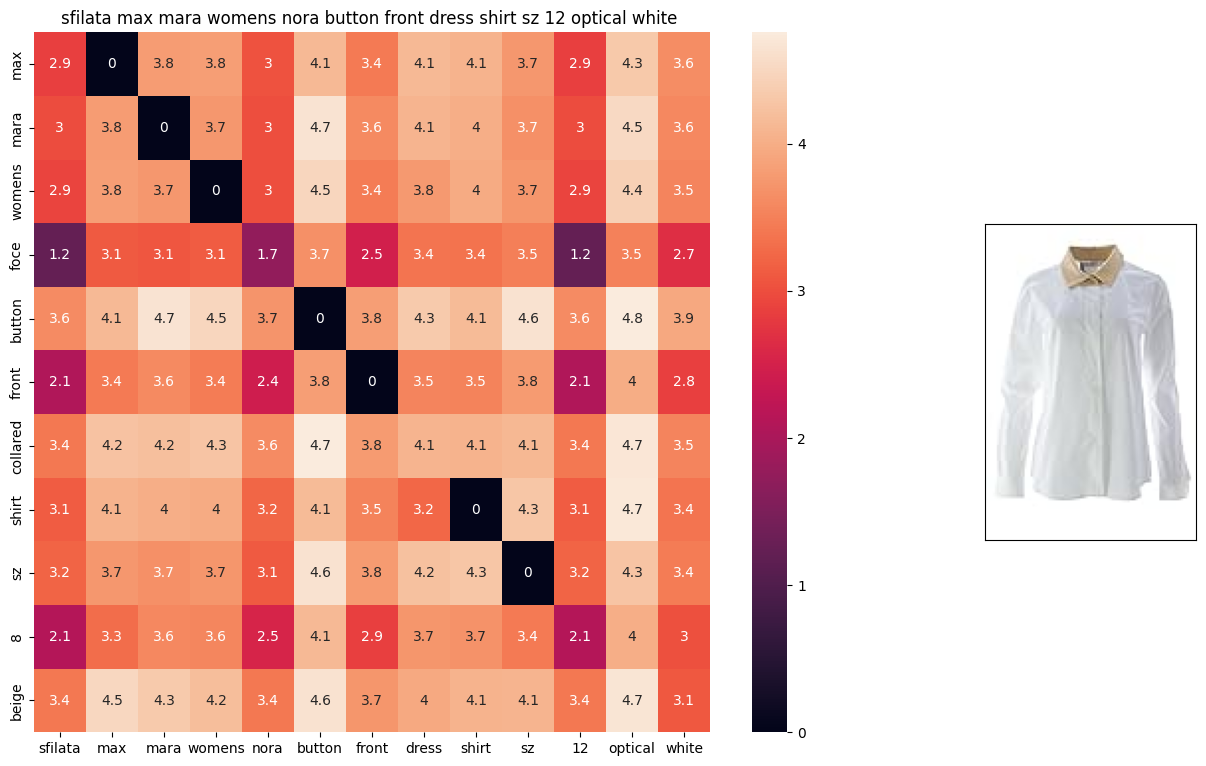

ASIN : B01N6AWF0N
BRAND : MaxMara
euclidean distance from given input image : 0.5824607


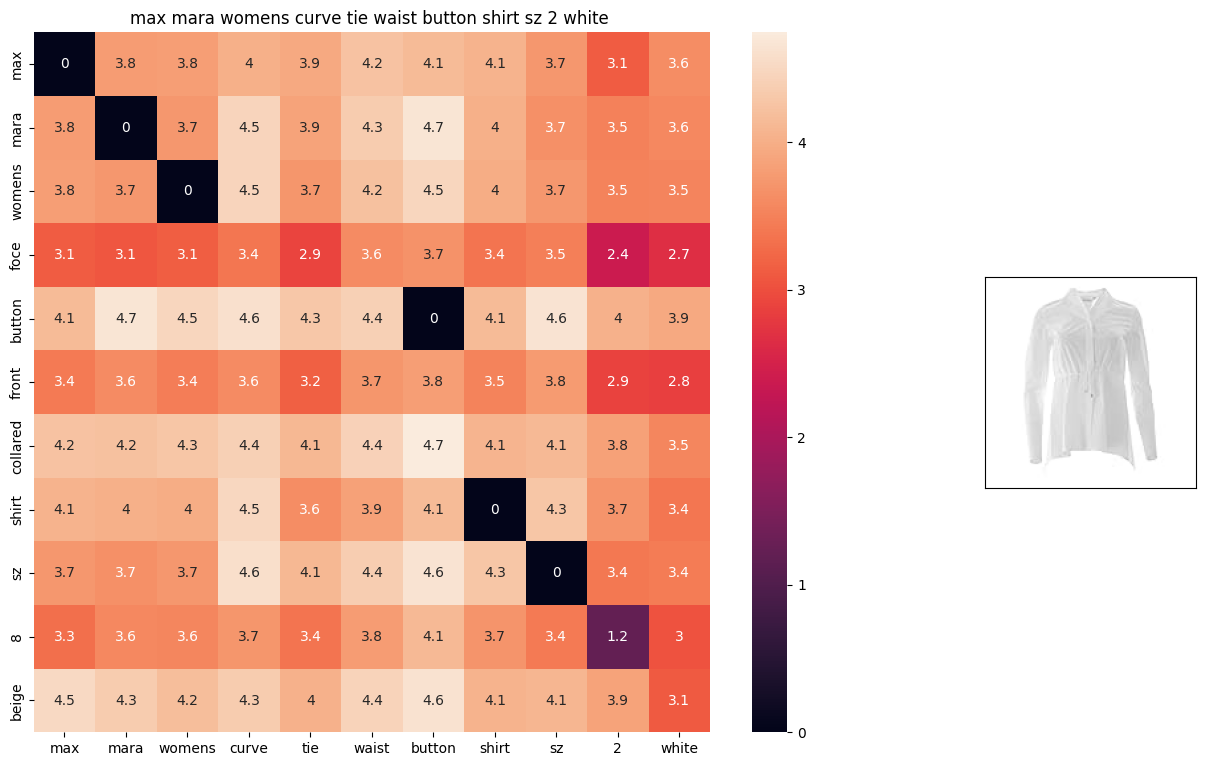

ASIN : B06WWJQ3P2
BRAND : MaxMara
euclidean distance from given input image : 0.6246925


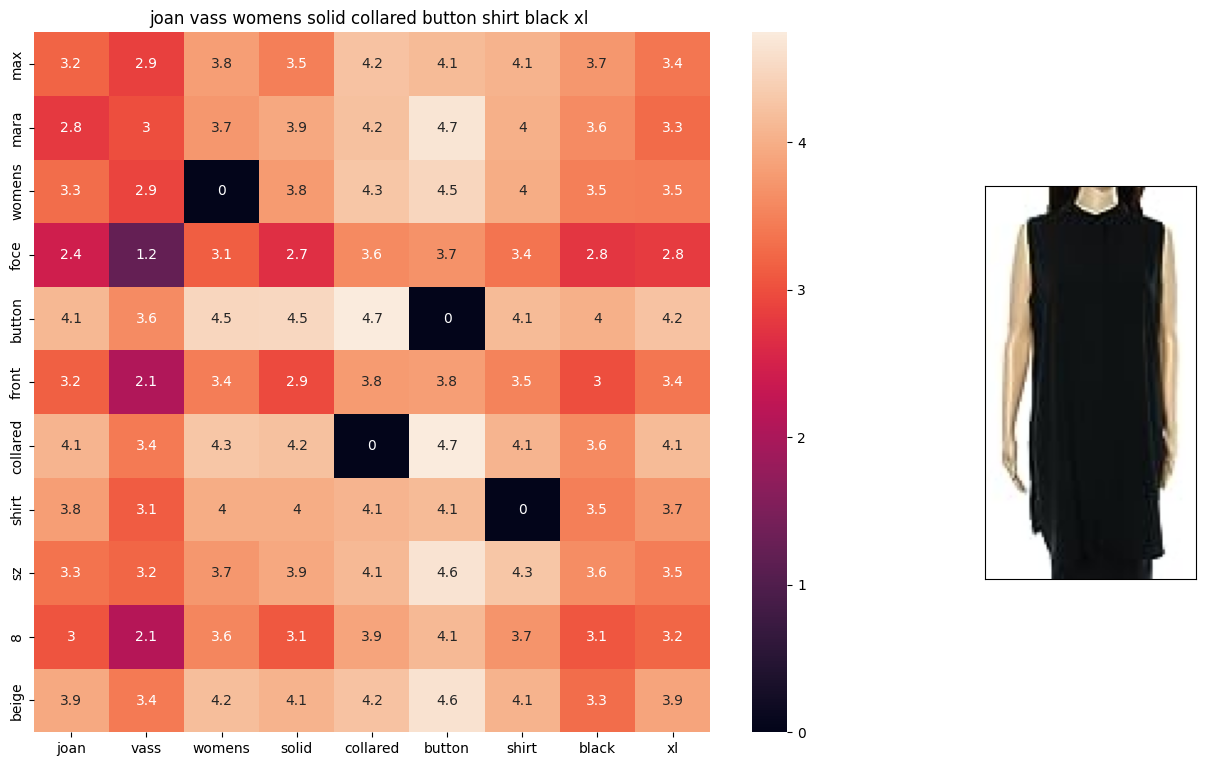

ASIN : B074VBFQ1X
BRAND : Joan Vass
euclidean distance from given input image : 0.6629441


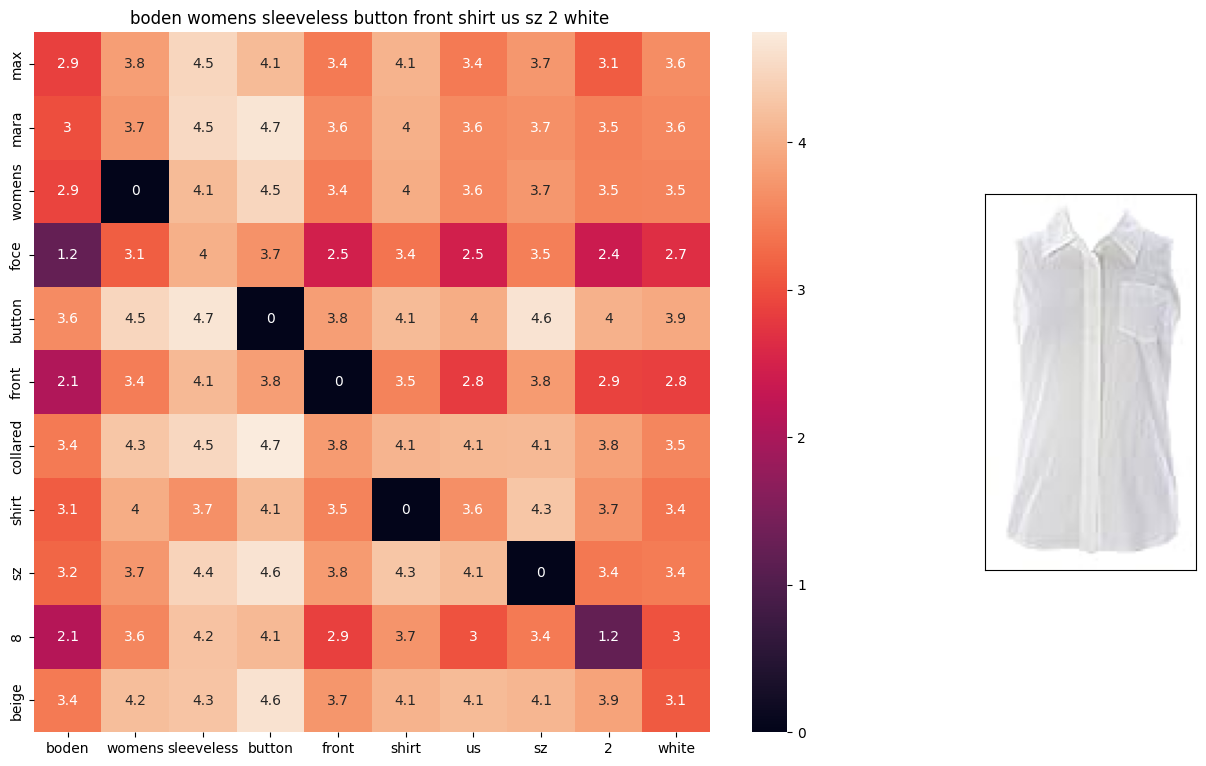

ASIN : B01H62U75W
BRAND : BODEN
euclidean distance from given input image : 0.67210203


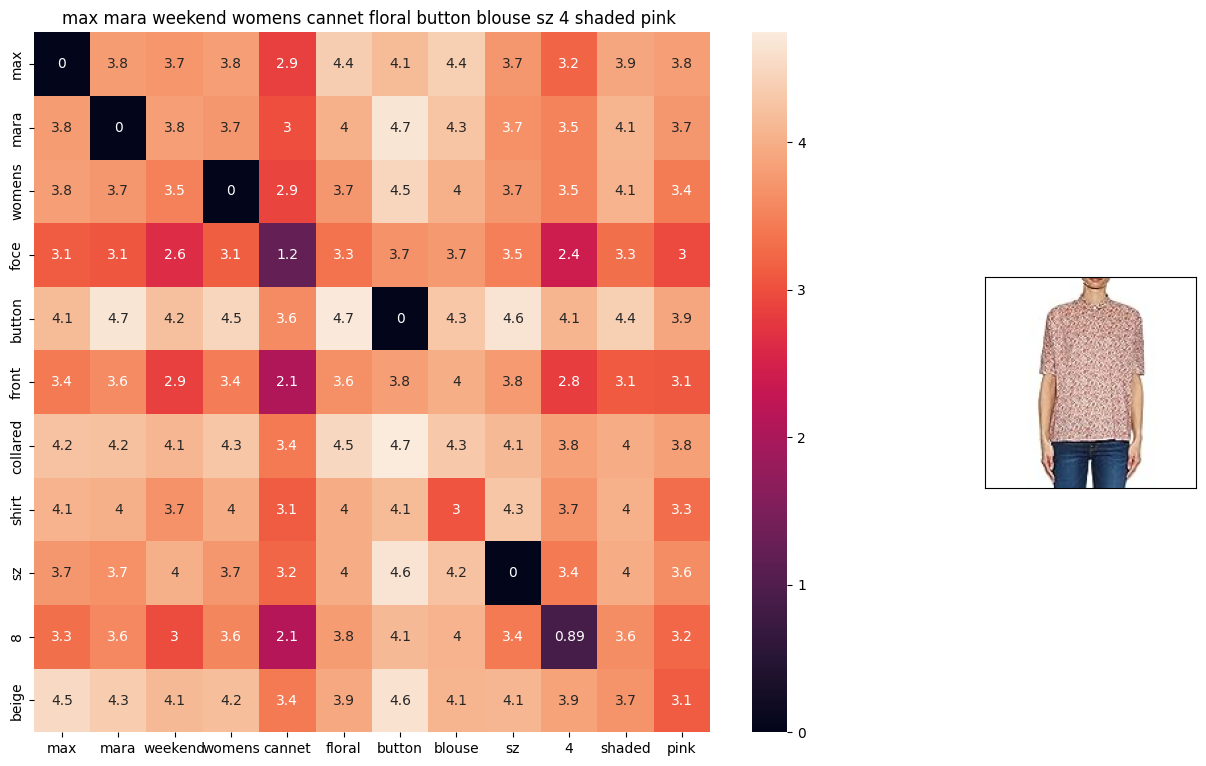

ASIN : B0713WJH8J
BRAND : MaxMara
euclidean distance from given input image : 0.683017


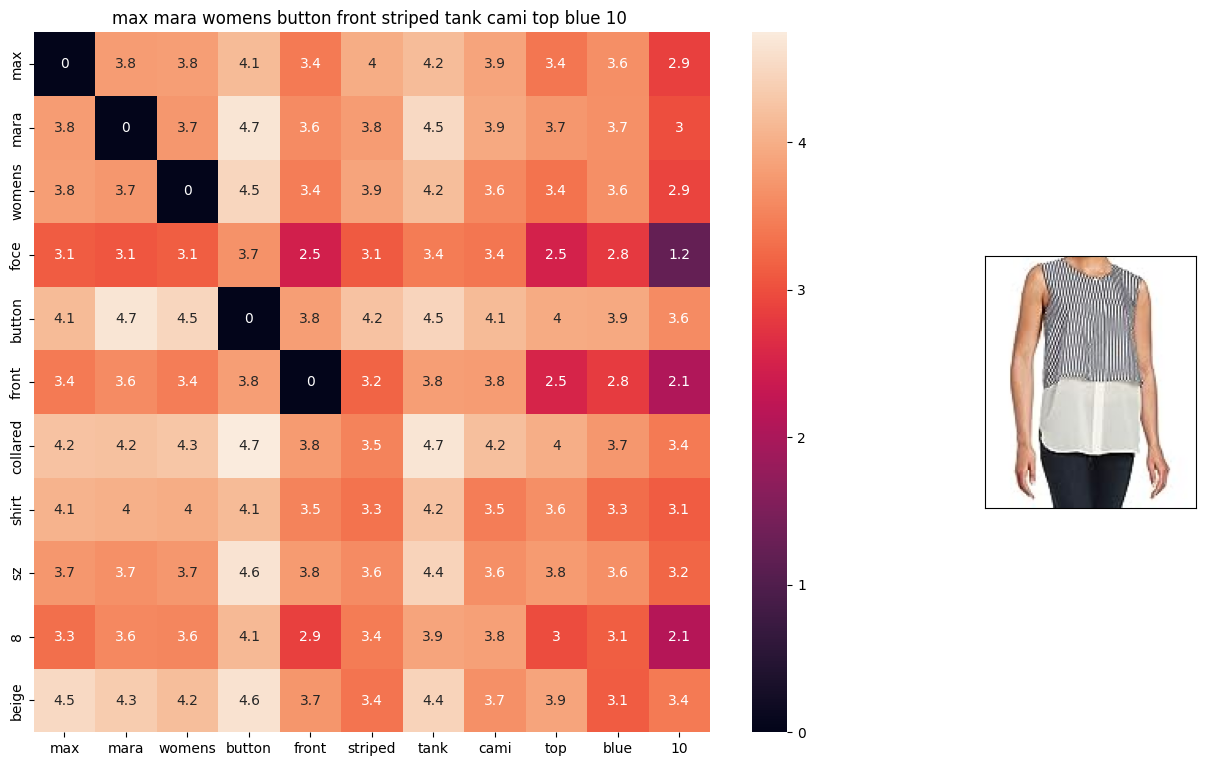

ASIN : B0758KDRF8
BRAND : MaxMara
euclidean distance from given input image : 0.70455915


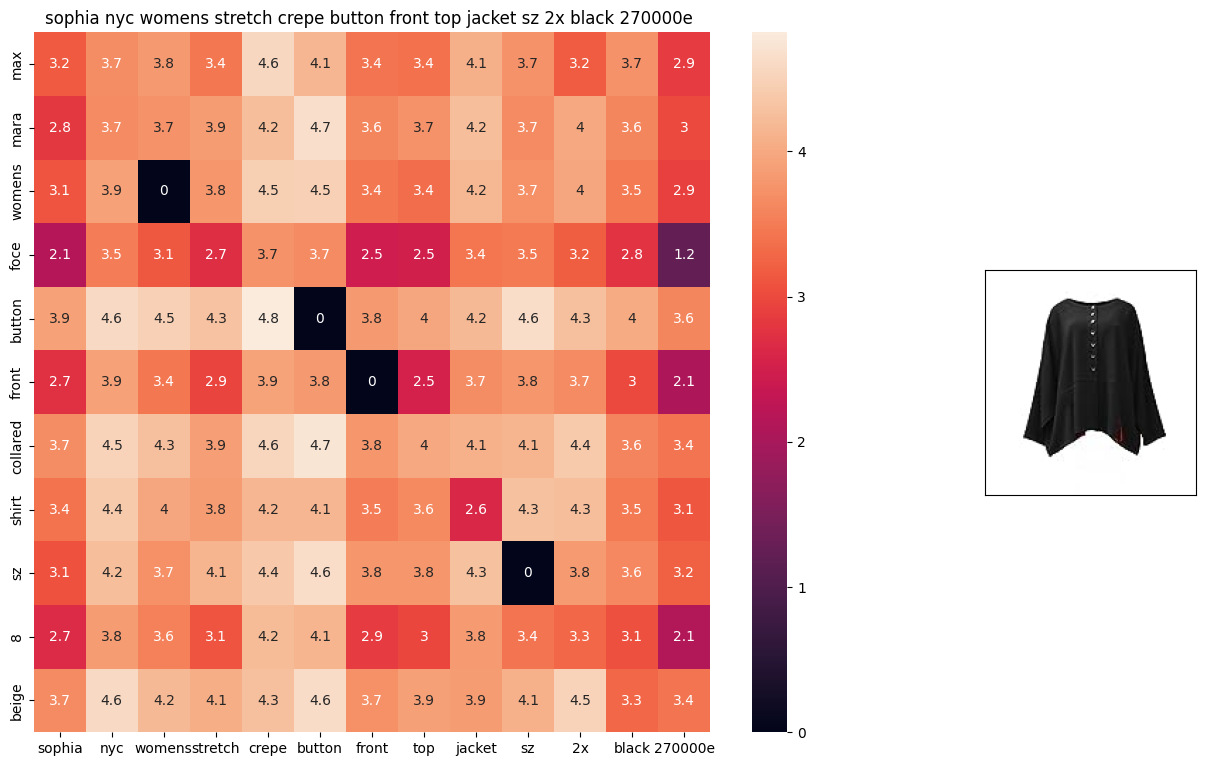

ASIN : B07522YS8B
BRAND : Sophia NYC
euclidean distance from given input image : 0.7095665


In [73]:
avg_w2v_model(19584, 10)

In [74]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [75]:
doc_id = 0
w2v_title_weight = []

for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1

w2v_title_weight = np.array(w2v_title_weight)

In [85]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.figure_factory as ff
import plotly.offline

def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):
    
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    
    s2_vec = get_word_vec(sentance2, doc_id2, model)

    
    words_sentence1 = sentance1.split()
    words_sentence2 = sentance2.split()

    if len(words_sentence1) != len(words_sentence2):
       
        min_length = min(len(words_sentence1), len(words_sentence2))
        words_sentence1 = words_sentence1[:min_length]
        words_sentence2 = words_sentence2[:min_length]

   
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    data_matrix = [['Asin', 'Brand', 'Color', 'Product type'],
                   [data['asin'].loc[df_id1], brands[doc_id1], colors[doc_id1], types[doc_id1]],  
                   [data['asin'].loc[df_id2], brands[doc_id2], colors[doc_id2], types[doc_id2]]] 
    colorscale = [[0, '#1d004d'], [.5, '#f2e5ff'], [1, '#f2e5d1']] 
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
 
    plotly.offline.iplot(table, filename='simple_table')

    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25, 5))

    ax1 = plt.subplot(gs[:, :-5])
   
    ax1 = sns.heatmap(np.round(s1_s2_dist, 6), annot=True)
    
    ax1.set_xticks(np.arange(len(words_sentence2)))
 
    ax1.set_xticklabels(words_sentence2)
    
    ax1.set_yticks(np.arange(len(words_sentence1)))
   
    ax1.set_yticklabels(words_sentence1)
 
    ax1.set_title(sentance2)

    ax2 = plt.subplot(gs[:, 10:16])
   
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])

    display_img(url, ax2, fig)

    plt.show()


In [86]:
def idf_w2v_brand(doc_id, w1, w2, num_results):
   
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

  
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
  
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)


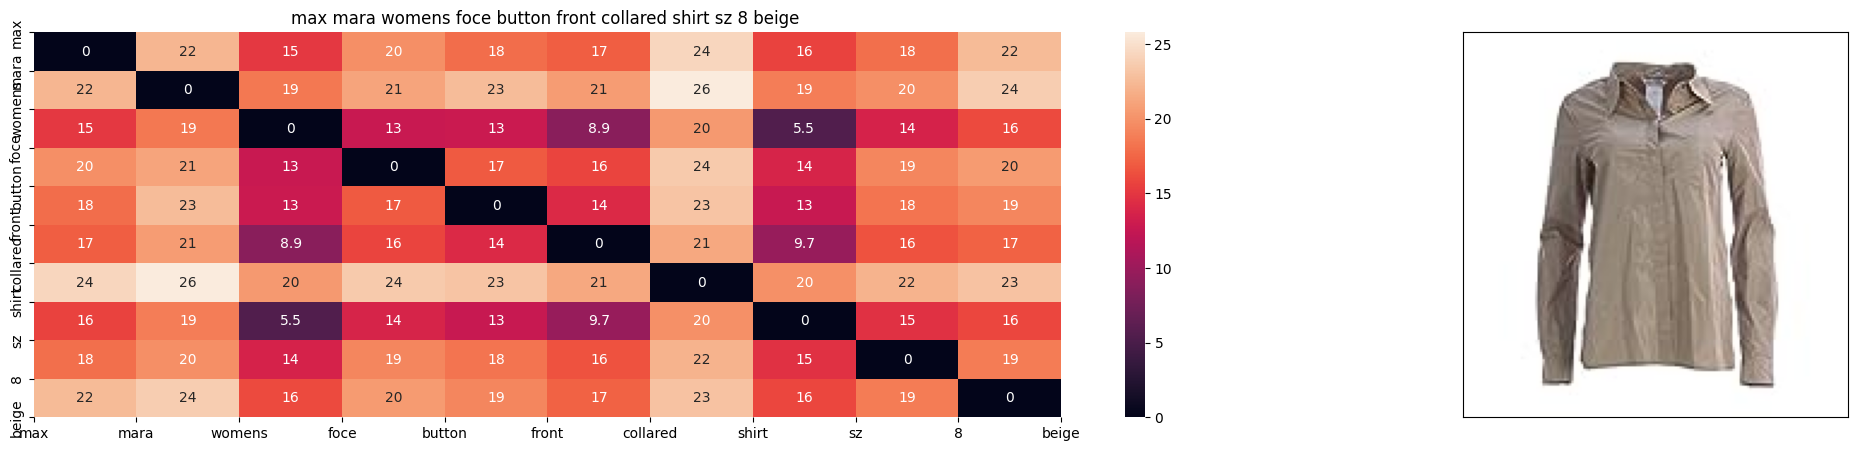

ASIN : B0749S36YR
Brand : MaxMara
euclidean distance from input : 0.0


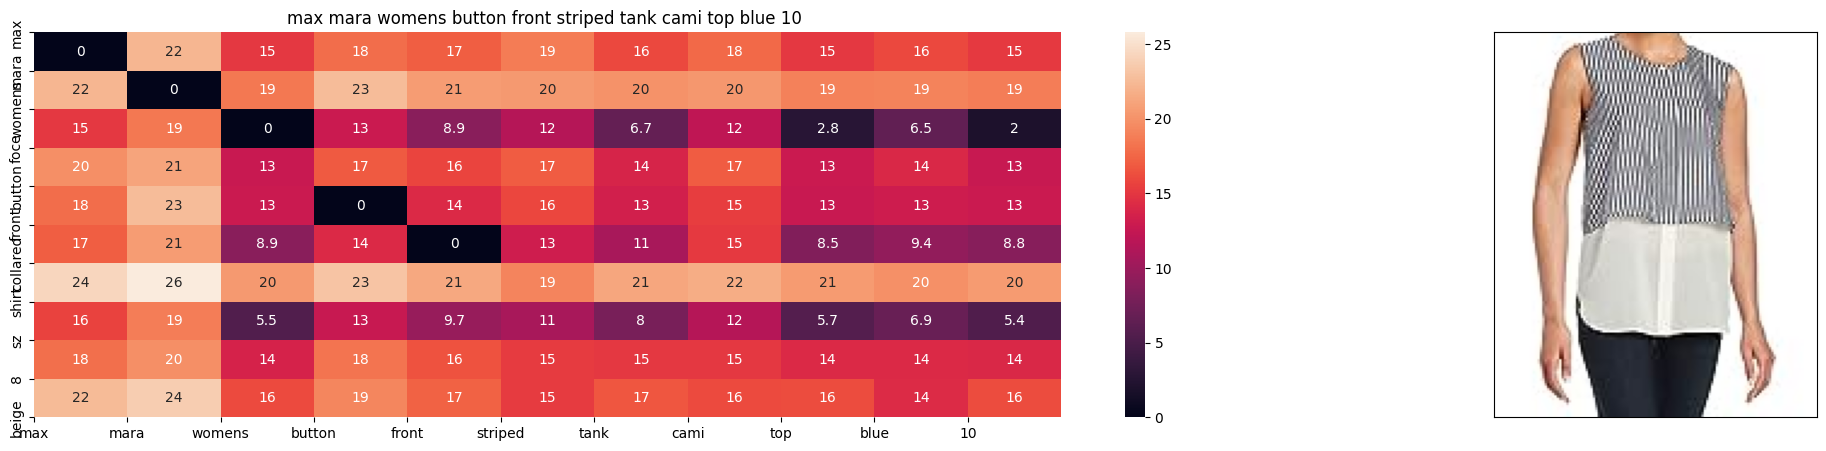

ASIN : B0758KDRF8
Brand : MaxMara
euclidean distance from input : 2.371870168170589


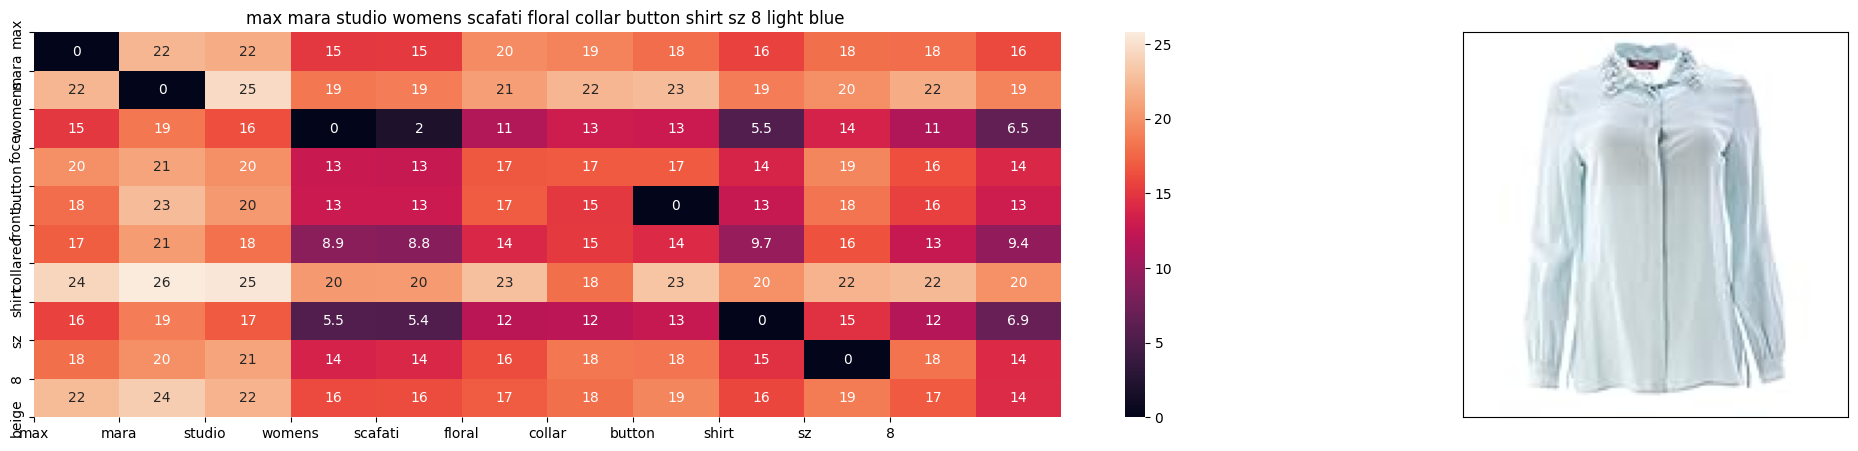

ASIN : B06XH7N85D
Brand : MaxMara
euclidean distance from input : 2.542386025618662


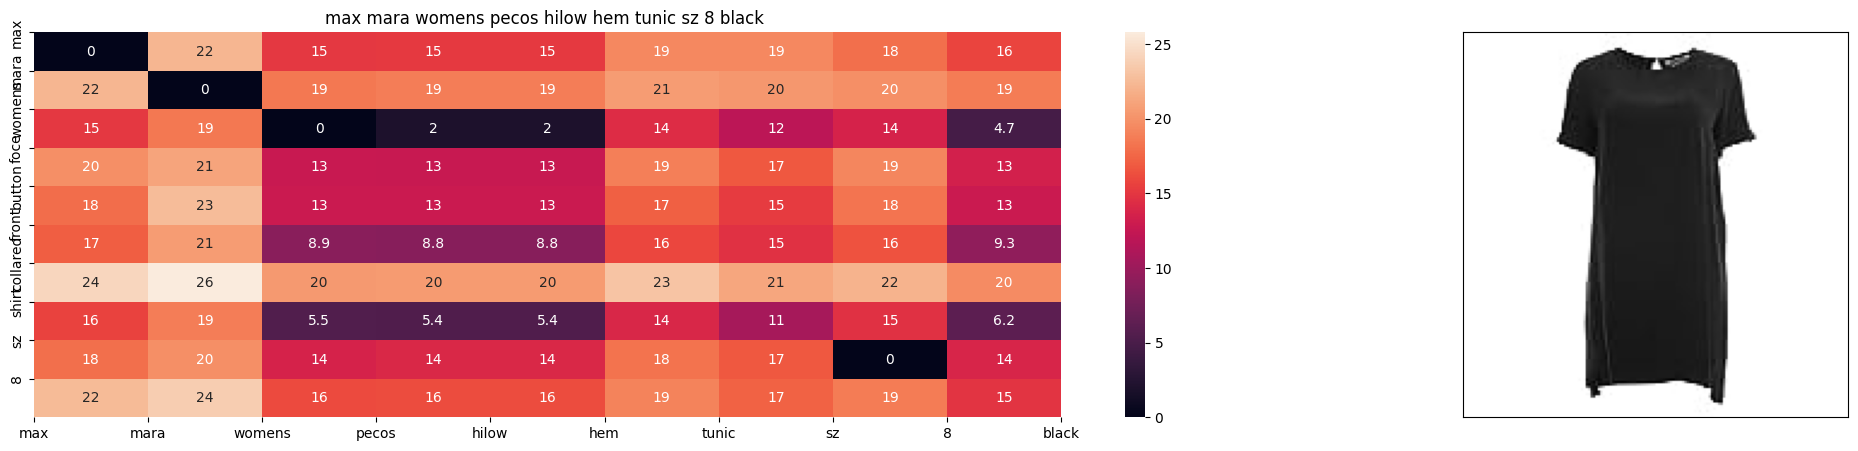

ASIN : B0749RNWZ3
Brand : MaxMara
euclidean distance from input : 2.700777435423193


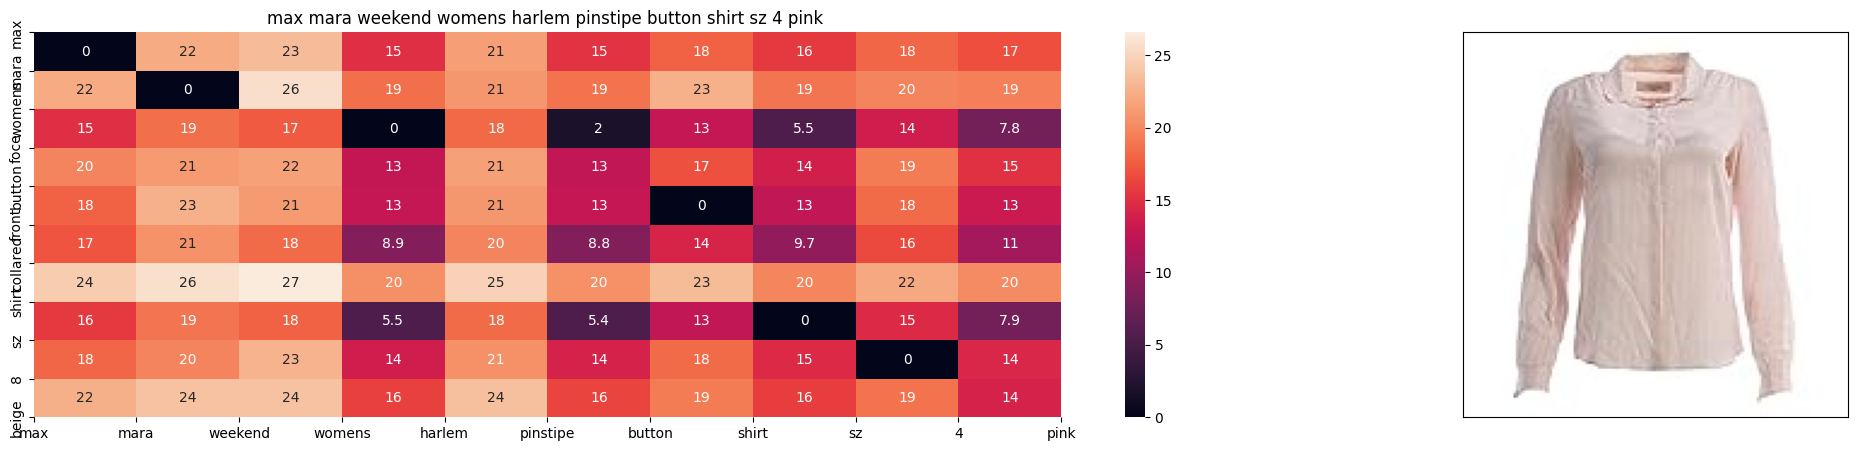

ASIN : B0749S8BQ7
Brand : MaxMara
euclidean distance from input : 2.7405446371647297


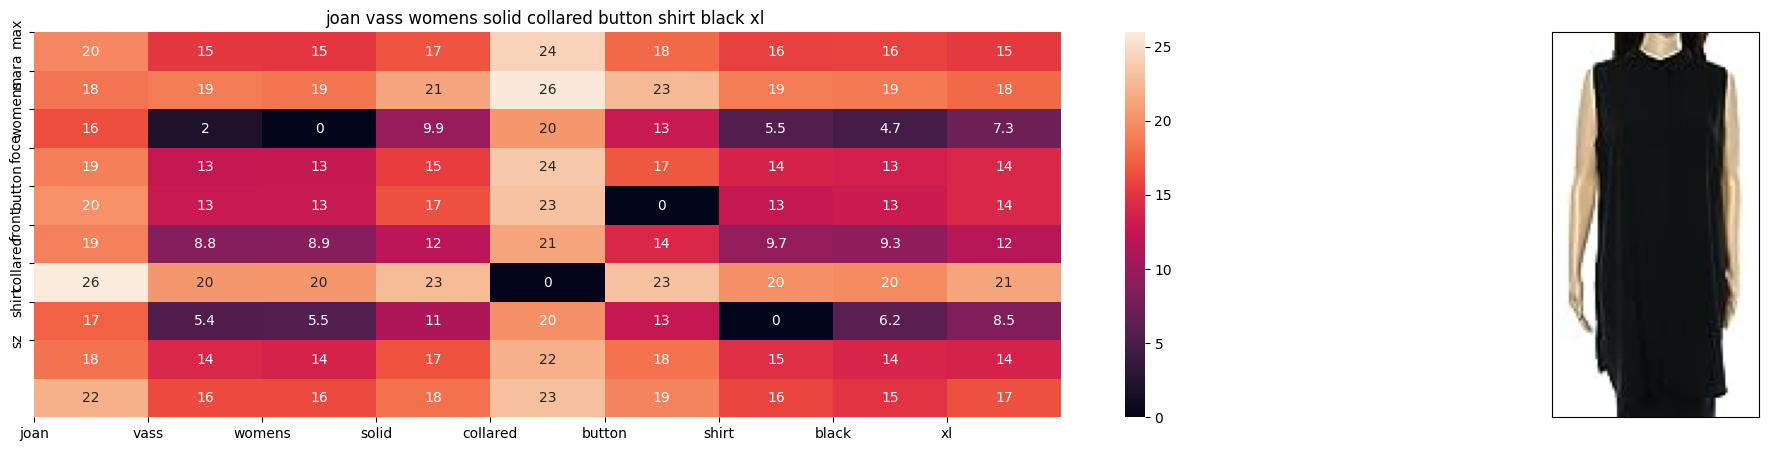

ASIN : B074VBFQ1X
Brand : Joan Vass
euclidean distance from input : 2.7747145384390572


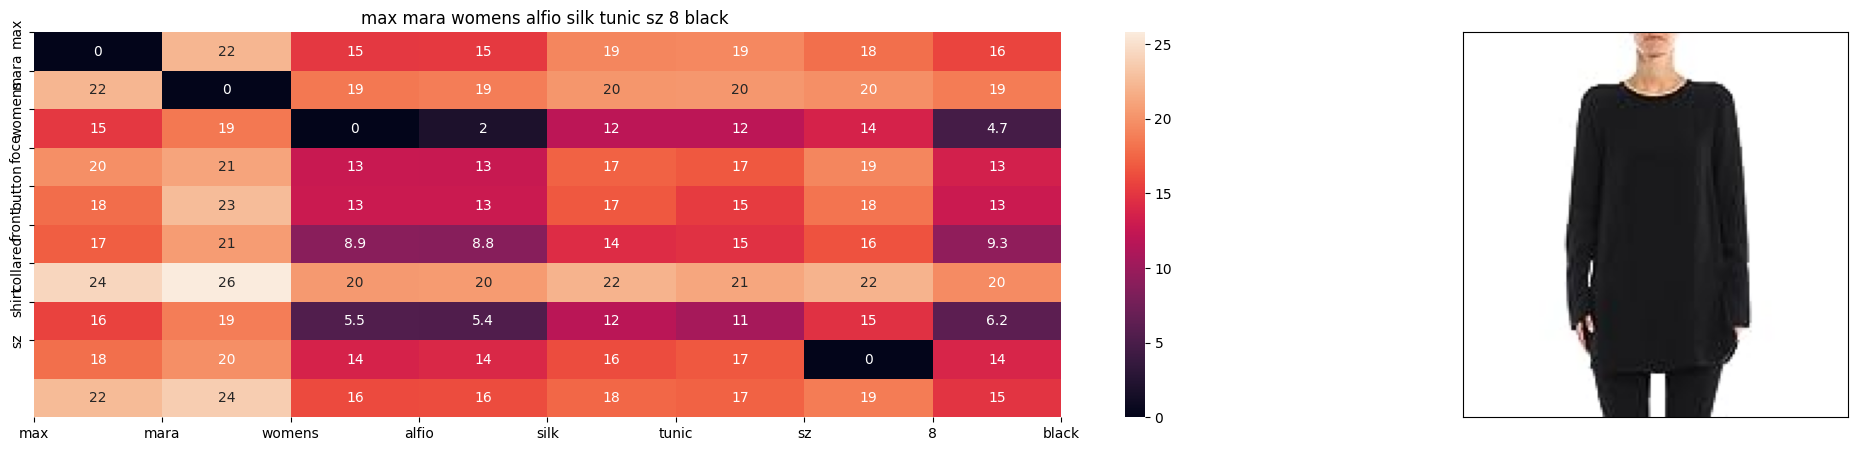

ASIN : B0749RSMGN
Brand : MaxMara
euclidean distance from input : 2.774887848020849


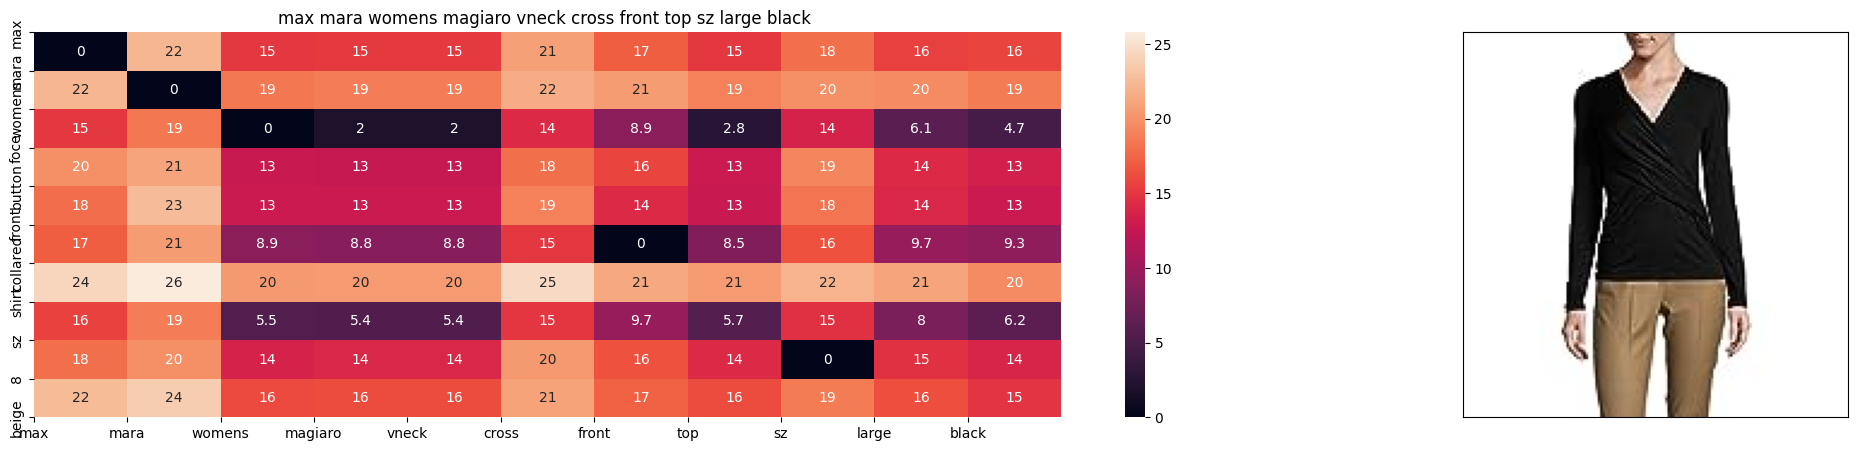

ASIN : B0749RQM72
Brand : MaxMara
euclidean distance from input : 2.8264620464257972


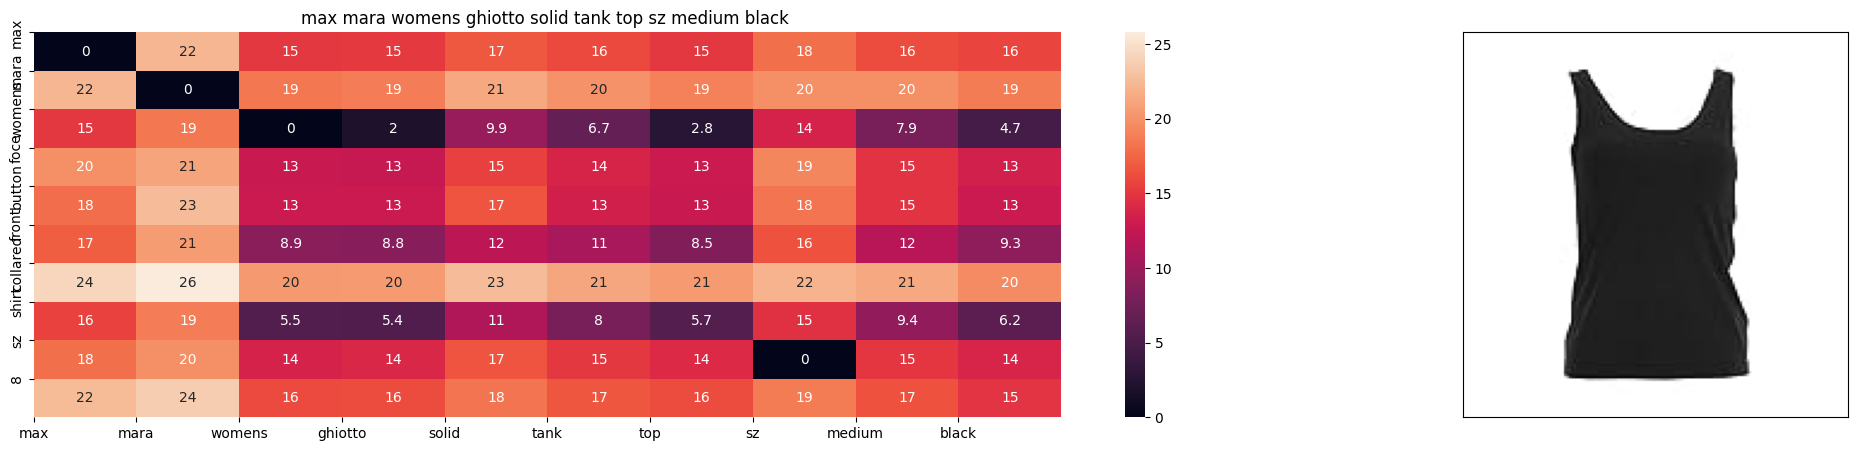

ASIN : B0749S88S3
Brand : MaxMara
euclidean distance from input : 2.8713228862695472


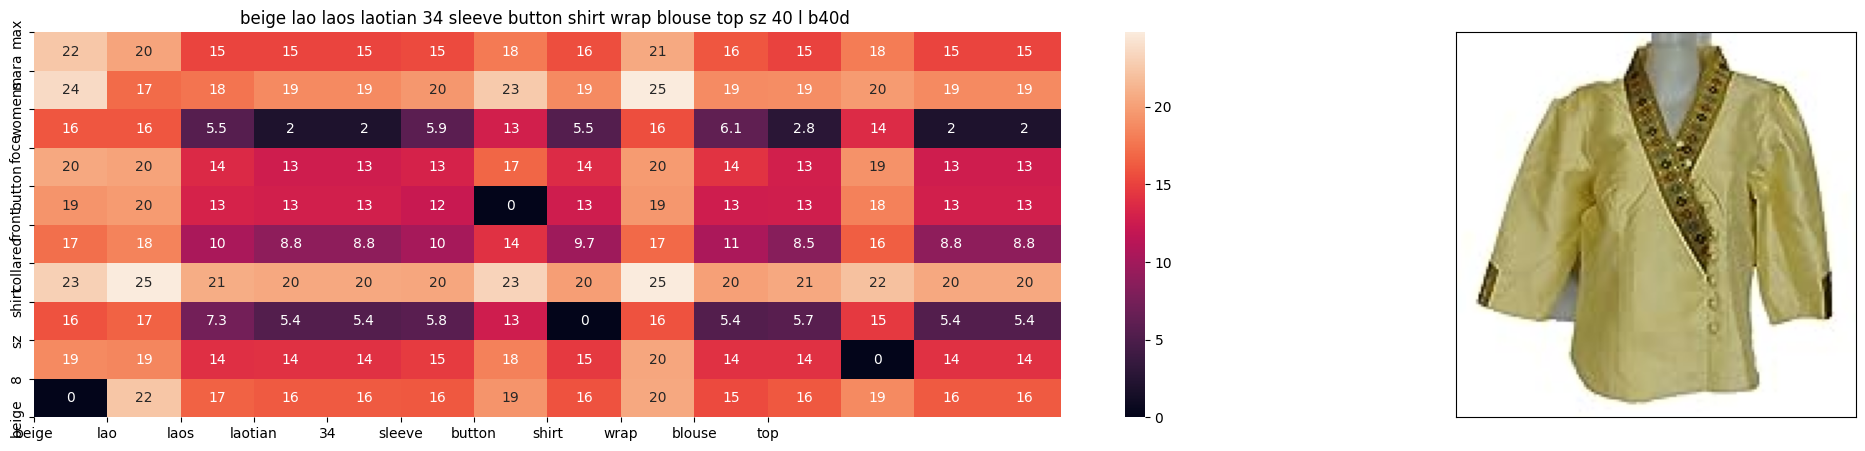

ASIN : B074GW9NFK
Brand : Nanon
euclidean distance from input : 2.886548614622412


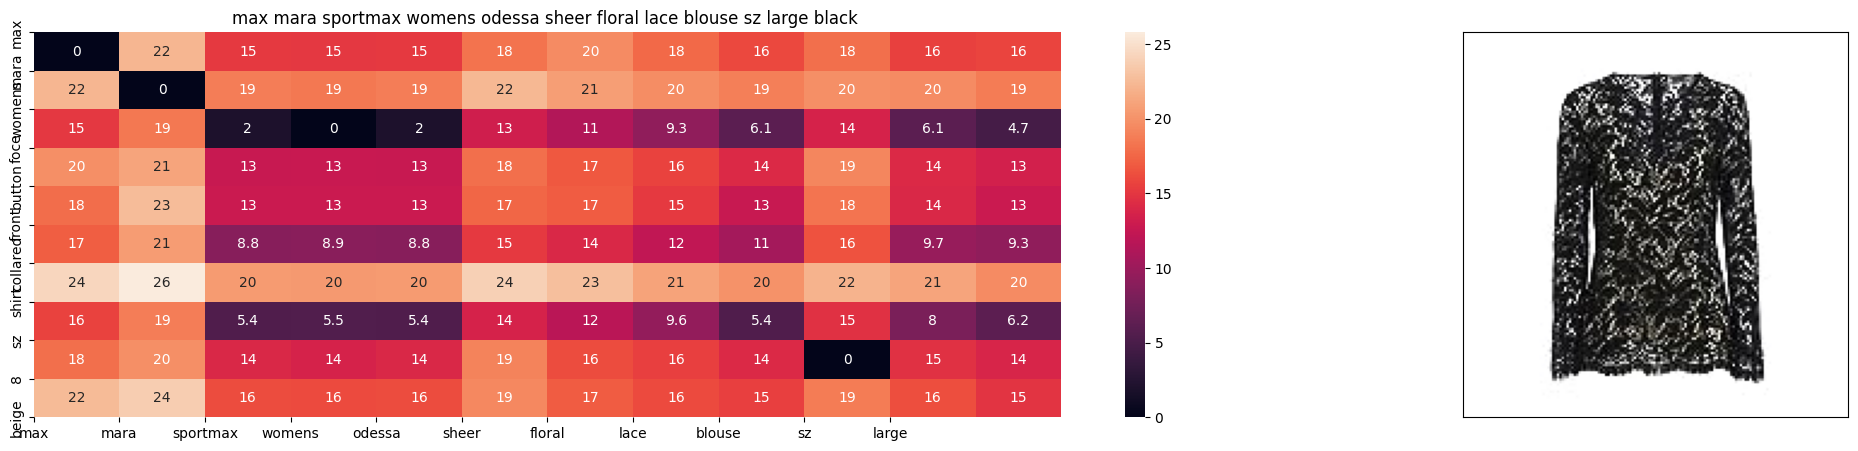

ASIN : B0749RKZ4Z
Brand : MaxMara
euclidean distance from input : 2.890712992470719


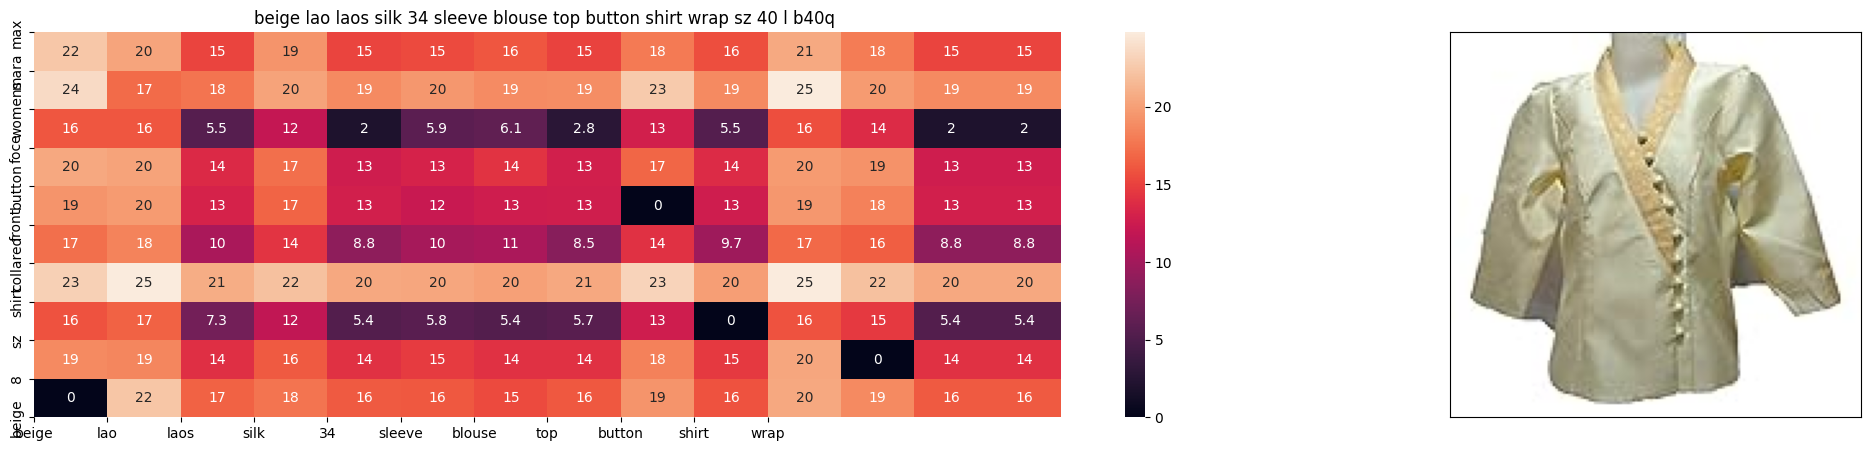

ASIN : B01LW6G077
Brand : Nanon
euclidean distance from input : 2.9010350546451984


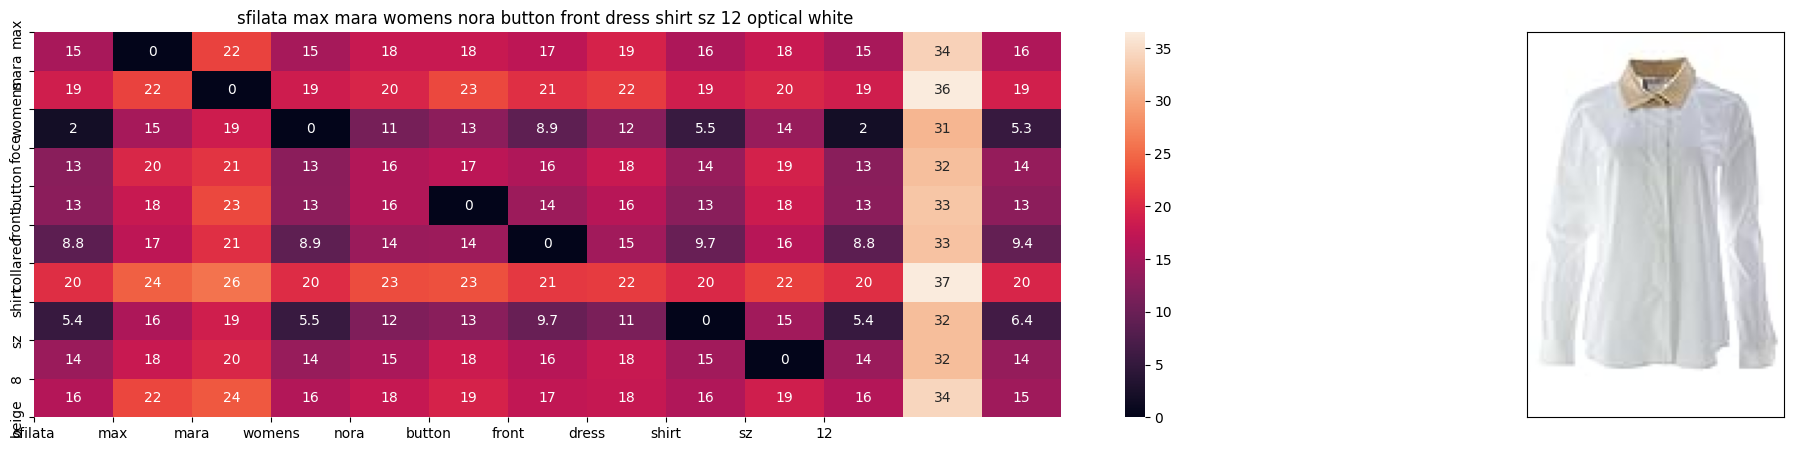

ASIN : B01N6AWF0N
Brand : MaxMara
euclidean distance from input : 2.9420678798667086


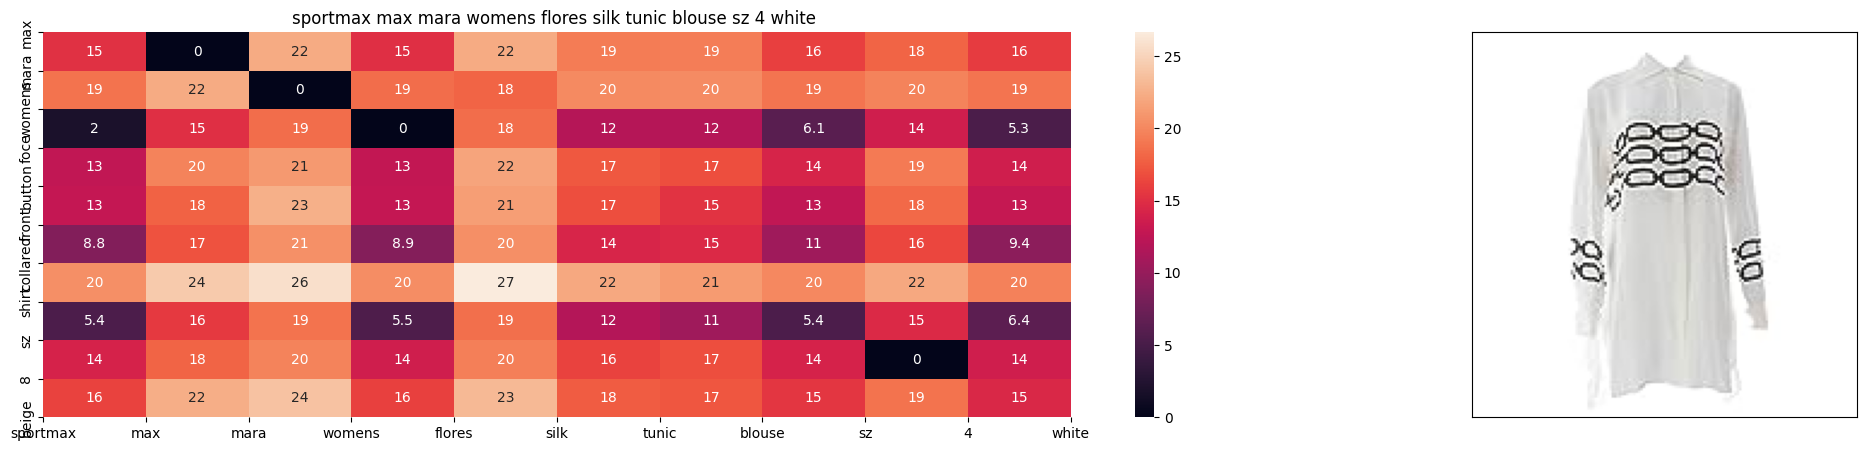

ASIN : B06X9PHLJD
Brand : MaxMara
euclidean distance from input : 2.981976572792985


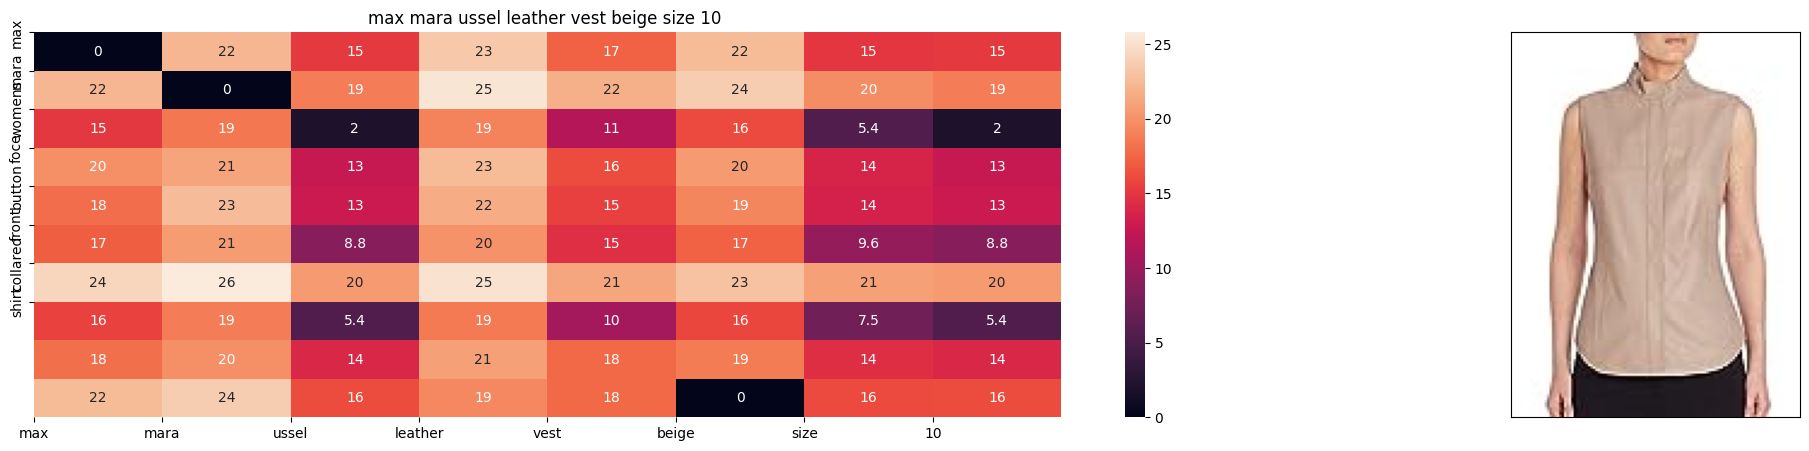

ASIN : B071WH4HCD
Brand : MaxMara
euclidean distance from input : 2.9830678305241047


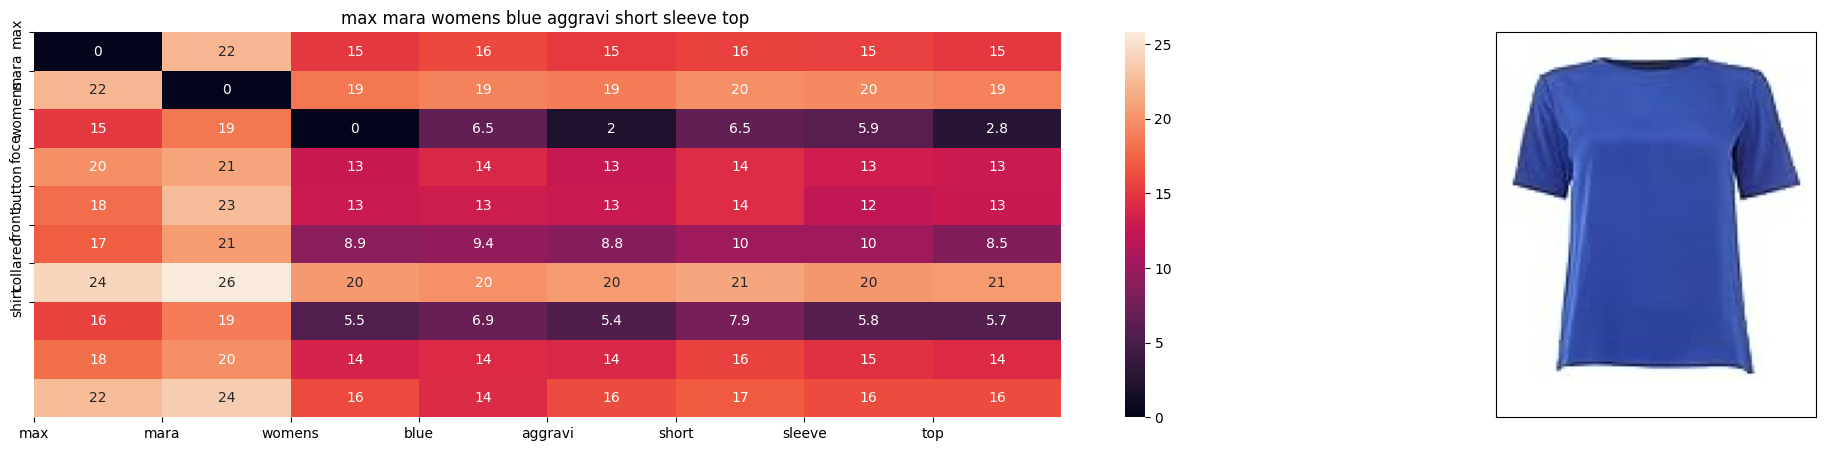

ASIN : B01M3XAV0M
Brand : Maxmara WeekEnd
euclidean distance from input : 2.9983227118165785


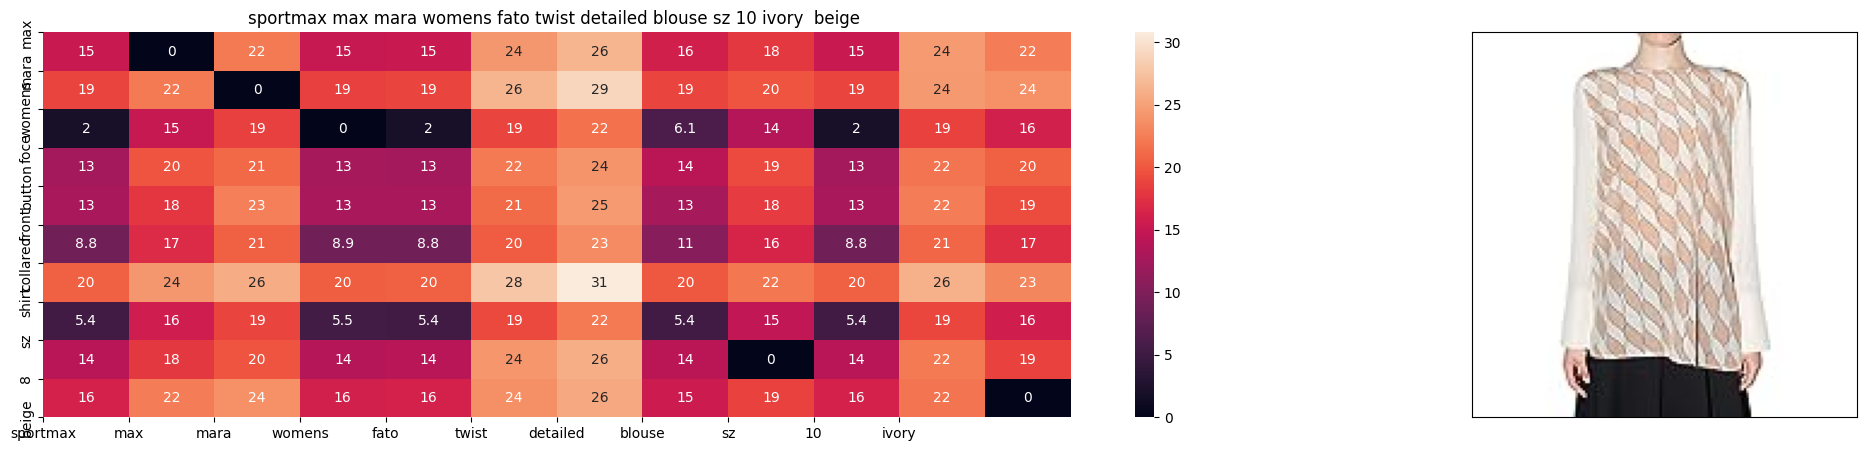

ASIN : B06XG2TBRQ
Brand : MaxMara
euclidean distance from input : 3.0062657674153646


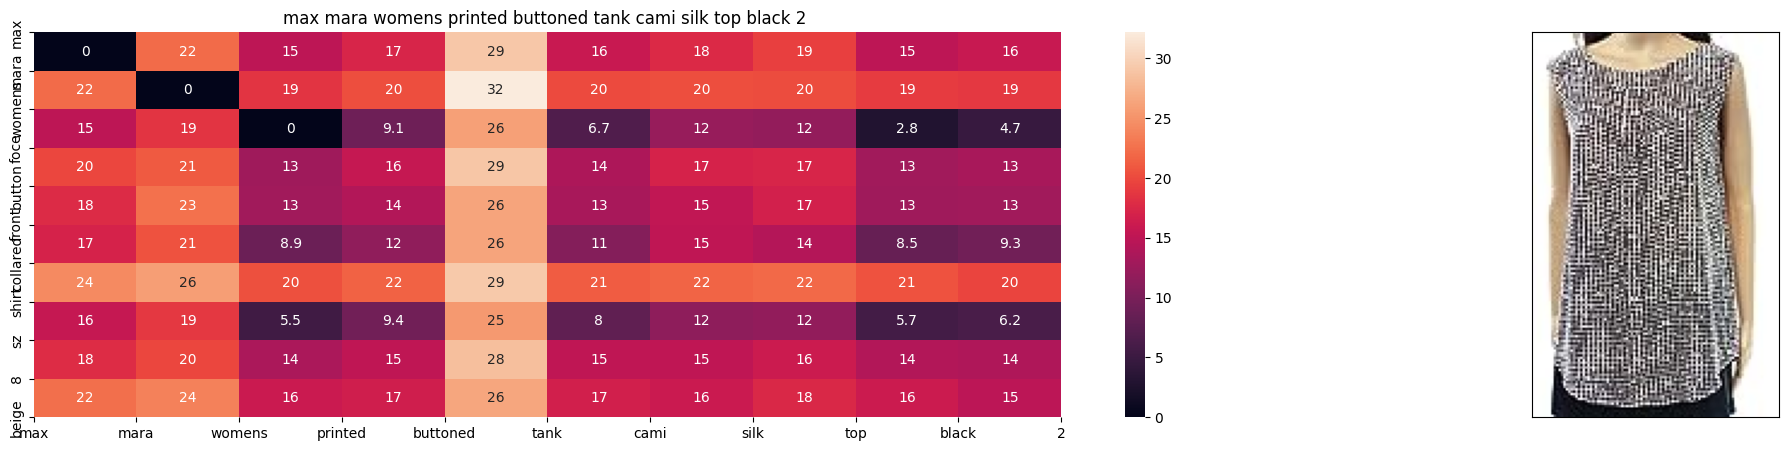

ASIN : B0746Q9RBM
Brand : MaxMara
euclidean distance from input : 3.0350756328515787


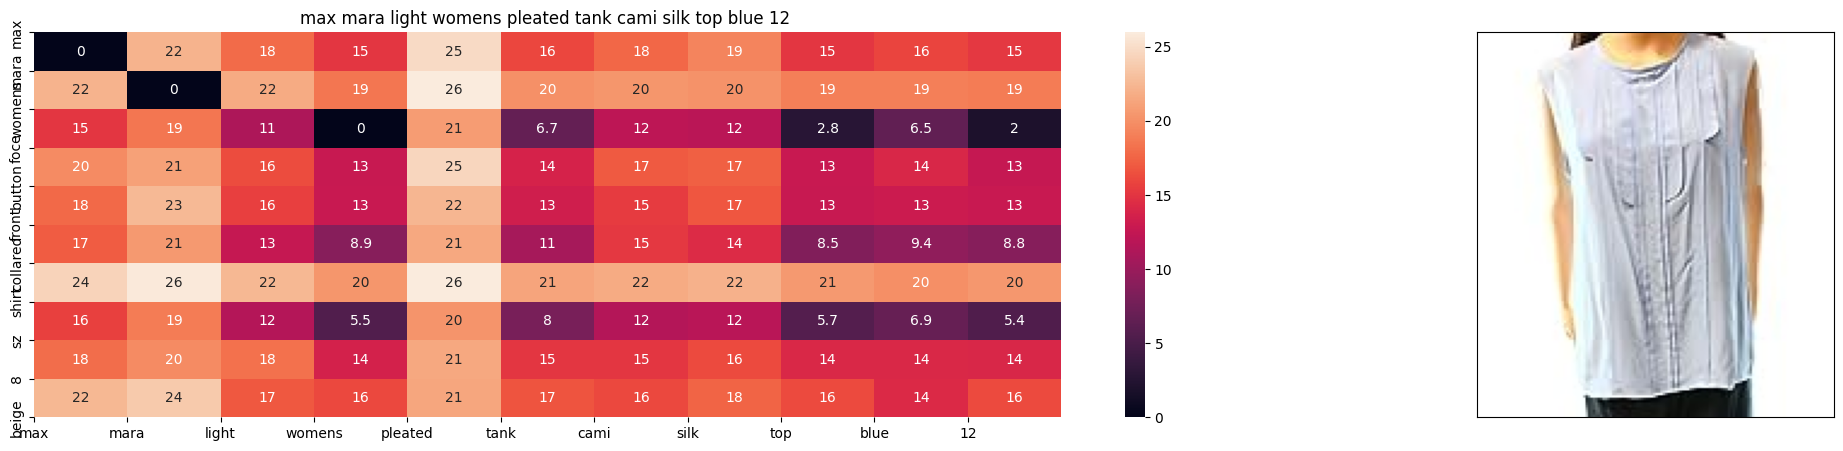

ASIN : B072184B8M
Brand : MaxMara
euclidean distance from input : 3.0382977804752764


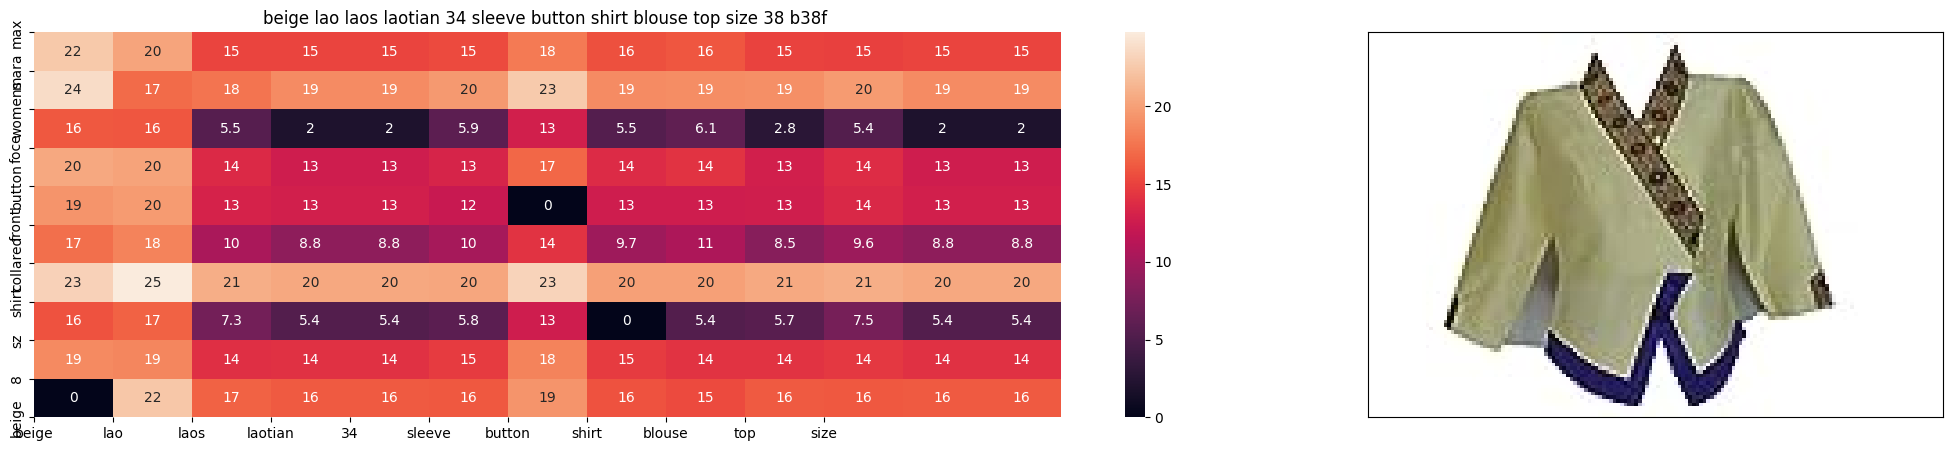

ASIN : B074GZMSTS
Brand : Nanon
euclidean distance from input : 3.04255396537111


In [87]:
idf_w2v_brand(19584, 10, 5, 20)